# 1. 작업 전 공통코드

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

In [4]:
# 한글 문제
# matplotlit의 기본 폰트에서 한글 지원되지 않기 때문에
# matplotlib의 폰트 변경 필요
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

In [5]:
# # 셀 자동 펼치기
# from IPython.display import display, Javascript

# # 모든 출력을 펼치는 JavaScript 코드
# javascript = """
# IPython.OutputArea.prototype._should_scroll = function(lines) {
#     return false;
# }
# """

# # JavaScript 코드 실행
# display(Javascript(javascript))

---

---

# 2. 데이터 전처리

## 1) 월별 데이터 병합

In [6]:
# 파일 경로
# file_path = "/content/drive/MyDrive/data/2023.{}월_29개 통신정보.xlsx" # 코랩용
file_path = "./data/2023.{}월_29개 통신정보.xlsx" # 로컬용

# 1월부터 9월까지의 데이터를 읽어오는 리스트 생성
dataframes = [pd.read_excel(file_path.format(month)) for month in range(1, 10)]

# 각 데이터프레임을 하나로 합치기
combined_df = pd.concat(dataframes)

# 성별 전처리
combined_df['성별'] = combined_df['성별'].replace({1:'M', 2:'F'})

# 숫자 데이터만 포함하는 열 선택
# numeric_df = combined_df.select_dtypes(include=[np.number])

# 동일한 위치의 셀들을 묶어 평균을 계산, 계층형 인덱스 사용 안함
average_df = combined_df.groupby(['자치구', '행정동', '성별','연령대']).mean().reset_index()

In [7]:
average_df.head()
# average_df.to_excel('./average.xlsx')

자치구   행정동 성별  연령대      행정동코드        총인구수       1인가구수  야간상주지 변경 미추정 인구 수  \
0  강남구  개포1동  F   20  1123068.0  582.925556   97.008889                0.0   
1  강남구  개포1동  F   25  1123068.0  602.852222  111.268889                0.0   
2  강남구  개포1동  F   30  1123068.0  458.930000  108.732222                0.0   
3  강남구  개포1동  F   35  1123068.0  352.687778   78.151111                0.0   
4  강남구  개포1동  F   40  1123068.0  398.371111   42.562222                0.0   

   야간상주지 변경횟수 평균  야간상주지 변경횟수: 4분위수, 25%  ...  배달_브랜드 서비스 사용 미추정 인구수  \
0       2.012222                    1.0  ...             562.245556   
1       2.138889                    1.0  ...             574.118889   
2       1.811111                    1.0  ...             427.324444   
3       1.958889                    1.0  ...             327.118889   
4       1.860000                    1.0  ...             369.315556   

   배달_브랜드 서비스 사용일수  배달_브랜드 서비스 사용일수: 4분위수, 25%  배달_브랜드 서비스 사용일수: 4분위수, 50%  \
0         2.471111                    2.224444                    2.224444   
1         1.823333                    1.670000                    1.670000   
2         2.402222                    1.670000                    1.854444   
3         2.576667                    1.670000                    2.038889   
4         2.661111                    1.670000                    1.854444   

   배달_브랜드 서비스 사용일수: 4분위수, 75%  배달_식재료 서비스 사용 미추정 인구수  배달_식재료 서비스 사용일수  \
0                    2.964444             568.648889         1.113333   
1                    2.038889             585.965556         1.298889   
2                    2.777778             450.264444         1.484444   
3                    2.776667             338.070000         1.670000   
4                    3.702222             388.084444         1.670000   

   배달_식재료 서비스 사용일수: 4분위수, 25%  배달_식재료 서비스 사용일수: 4분위수, 50%  \
0                    1.113333                    1.113333   
1                    1.298889                    1.298889   
2                    1.484444                    1.484444   
3                    1.670000                    1.670000   
4                    1.670000                    1.670000   

   배달_식재료 서비스 사용일수: 4분위수, 75%  
0                    1.113333  
1                    1.298889  
2                    1.484444  
3                    1.670000  
4                    1.670000  

[5 rows x 143 columns]

### (1) 연령대 10단위 지정 함수

In [8]:
def merge_age(age):
    return int((age // 10) * 10)

### (2) 필요 col만 고르기

In [9]:
average_df_col = average_df[
    ['자치구','성별','연령대','총인구수',
     '게임 서비스 사용일수', '금융 서비스 사용일수','배달 서비스 사용일수','쇼핑 서비스 사용일수', # 가나다순
     '동영상/방송 서비스 사용일수','넷플릭스 사용일수','유튜브 사용일수']] # 여가관련(3개)

In [10]:
average_df_col

자치구 성별  연령대         총인구수  게임 서비스 사용일수  금융 서비스 사용일수  배달 서비스 사용일수  \
0      강남구  F   20   582.925556    39.686667    79.526667    11.141111   
1      강남구  F   25   602.852222    44.793333    97.361111    16.495556   
2      강남구  F   30   458.930000    39.816667   106.191111    15.728889   
3      강남구  F   35   352.687778    35.945556   119.805556    14.350000   
4      강남구  F   40   398.371111    42.202222    99.033333    14.900000   
...    ... ..  ...          ...          ...          ...          ...   
10171  중랑구  M   55  1401.283333    51.075556    70.198889    10.894444   
10172  중랑구  M   60   966.955556    47.791111    50.937778     9.208889   
10173  중랑구  M   65   717.738889    43.452222    42.567778    10.006667   
10174  중랑구  M   70   451.097778    36.500000    26.900000    12.422222   
10175  중랑구  M   75   643.733333    31.674444    19.671111    20.338889   

       쇼핑 서비스 사용일수  동영상/방송 서비스 사용일수  넷플릭스 사용일수  유튜브 사용일수  
0       134.943333        29.418889  -0.082222  0.137778  
1       149.551111        33.026667  -0.037778  0.158889  
2       190.410000        33.768889  -0.097778  0.135556  
3       225.784444        37.581111  -0.071111  0.022222  
4       192.226667        31.502222  -0.208889  0.018889  
...            ...              ...        ...       ...  
10171    99.160000        25.616667  -0.578889 -0.024444  
10172    73.138889        21.291111  -0.605556 -0.095556  
10173    58.428889        18.103333  -0.636667 -0.135556  
10174    38.092222        12.368889  -0.654444 -0.222222  
10175    23.063333        11.596667  -0.660000 -0.508889  

[10176 rows x 11 columns]

### (3) 데이터 성별 구분

In [11]:
average_df_col_M = average_df_col[average_df_col['성별'] == 'M']

In [12]:
average_df_col_M

자치구 성별  연령대         총인구수  게임 서비스 사용일수  금융 서비스 사용일수  배달 서비스 사용일수  \
12     강남구  M   20   595.452222    65.726667    85.362222    11.351111   
13     강남구  M   25   547.362222    69.936667    99.428889    13.670000   
14     강남구  M   30   597.981111    75.233333   140.218889    16.953333   
15     강남구  M   35   355.645556    56.015556   129.908889    15.830000   
16     강남구  M   40   310.815556    63.286667   142.825556    11.345556   
...    ... ..  ...          ...          ...          ...          ...   
10171  중랑구  M   55  1401.283333    51.075556    70.198889    10.894444   
10172  중랑구  M   60   966.955556    47.791111    50.937778     9.208889   
10173  중랑구  M   65   717.738889    43.452222    42.567778    10.006667   
10174  중랑구  M   70   451.097778    36.500000    26.900000    12.422222   
10175  중랑구  M   75   643.733333    31.674444    19.671111    20.338889   

       쇼핑 서비스 사용일수  동영상/방송 서비스 사용일수  넷플릭스 사용일수  유튜브 사용일수  
12       86.282222        29.785556  -0.270000  0.197778  
13      131.148889        36.562222  -0.084444  0.270000  
14      156.870000        46.252222  -0.092222  0.234444  
15      153.097778        37.270000  -0.063333  0.094444  
16      176.917778        43.178889  -0.101111  0.108889  
...            ...              ...        ...       ...  
10171    99.160000        25.616667  -0.578889 -0.024444  
10172    73.138889        21.291111  -0.605556 -0.095556  
10173    58.428889        18.103333  -0.636667 -0.135556  
10174    38.092222        12.368889  -0.654444 -0.222222  
10175    23.063333        11.596667  -0.660000 -0.508889  

[5088 rows x 11 columns]

In [13]:
average_df_col_F = average_df_col[average_df_col['성별'] == 'F']

In [14]:
average_df_col_F

자치구 성별  연령대         총인구수  게임 서비스 사용일수  금융 서비스 사용일수  배달 서비스 사용일수  \
0      강남구  F   20   582.925556    39.686667    79.526667    11.141111   
1      강남구  F   25   602.852222    44.793333    97.361111    16.495556   
2      강남구  F   30   458.930000    39.816667   106.191111    15.728889   
3      강남구  F   35   352.687778    35.945556   119.805556    14.350000   
4      강남구  F   40   398.371111    42.202222    99.033333    14.900000   
...    ... ..  ...          ...          ...          ...          ...   
10159  중랑구  F   55  1381.795556    45.943333    66.170000     8.725556   
10160  중랑구  F   60   992.366667    44.673333    51.010000     9.536667   
10161  중랑구  F   65   760.851111    38.194444    36.188889     7.558889   
10162  중랑구  F   70   571.616667    34.830000    23.091111    13.226667   
10163  중랑구  F   75   890.182222    30.776667    20.048889     9.994444   

       쇼핑 서비스 사용일수  동영상/방송 서비스 사용일수  넷플릭스 사용일수  유튜브 사용일수  
0       134.943333        29.418889  -0.082222  0.137778  
1       149.551111        33.026667  -0.037778  0.158889  
2       190.410000        33.768889  -0.097778  0.135556  
3       225.784444        37.581111  -0.071111  0.022222  
4       192.226667        31.502222  -0.208889  0.018889  
...            ...              ...        ...       ...  
10159   114.991111        19.671111  -0.541111 -0.103333  
10160    82.228889        17.035556  -0.596667 -0.143333  
10161    59.191111        14.910000  -0.634444 -0.176667  
10162    37.906667        10.334444  -0.643333 -0.321111  
10163    27.600000         9.262222  -0.653333 -0.632222  

[5088 rows x 11 columns]

---

## 2) 자치구 평균 연령대

### (1) 남녀 통합

In [15]:
# data = pd.read_excel('./average.xlsx')
data = average_df_col.copy()

data['자치구 연령대 총합'] = data['연령대'] * data['총인구수']
total = data.groupby(['자치구'])['총인구수'].sum()

average_age_total = pd.DataFrame()
average_age_total['평균 연령대'] = data.groupby(['자치구'])['자치구 연령대 총합'].sum() / total
total = np.ceil(total).astype(int) # 총인구수 정수올림
average_age_total['총인구수'] = total
average_age_total = average_age_total.reset_index()

In [16]:
average_age_total.head()
# average_age_total.to_excel('./average_age_total.xlsx')

자치구     평균 연령대    총인구수
0  강남구  43.568631  438671
1  강동구  44.537185  365446
2  강북구  46.119801  268472
3  강서구  43.995298  468525
4  관악구  42.507726  447982

### (2) 남녀 구분

In [17]:
# data = pd.read_excel('./average.xlsx')
data = average_df_col.copy()

data['자치구 성별 연령대 총합'] = data['연령대'] * data['총인구수']
total = data.groupby(['자치구', '성별'])['총인구수'].sum()

average_age_sex = pd.DataFrame()
average_age_sex['평균 연령대'] = data.groupby(['자치구', '성별'])['자치구 성별 연령대 총합'].sum() / total
total = np.ceil(total).astype(int) # 총인구수 정수올림
average_age_sex['총인구수'] = total 
average_age_sex = average_age_sex.reset_index()

In [18]:
average_age_sex.head()
# average_age_sex.to_excel('./average_age_sex.xlsx')

자치구 성별     평균 연령대    총인구수
0  강남구  F  43.678562  232664
1  강남구  M  43.444475  206007
2  강동구  F  45.086388  186495
3  강동구  M  43.964831  178951
4  강북구  F  46.994863  138558

---

## 3) 자치구 연령대별 총인구수

### (1) 남녀 통합

In [19]:
# data = pd.read_excel('./average.xlsx')
data = average_df_col.copy()

age_most_region_total = pd.DataFrame()
age_most_region_total['총인구수'] = data.groupby(['자치구','연령대'])['총인구수'].sum().apply(np.ceil).astype(int)
age_most_region_total = age_most_region_total.reset_index().sort_values(by=['자치구','연령대'])

# 연령대 10단위 묶음
age_most_region_total['연령대'] = age_most_region_total['연령대'].apply(merge_age)
age_most_region_total_10 = age_most_region_total.groupby(['자치구', '연령대'])['총인구수'].sum().reset_index()

In [20]:
age_most_region_total_10
# age_most_region_total_10.to_excel('./age_most_region_total_10.xlsx')

자치구  연령대   총인구수
0    강남구   20  75379
1    강남구   30  95214
2    강남구   40  98012
3    강남구   50  82029
4    강남구   60  52984
..   ...  ...    ...
145  중랑구   30  64895
146  중랑구   40  65728
147  중랑구   50  71300
148  중랑구   60  45332
149  중랑구   70  32817

[150 rows x 3 columns]

### (2) 남녀 구분

In [21]:
# data = pd.read_excel('./average.xlsx')
data = average_df_col

age_most_region_sex = pd.DataFrame()
age_most_region_sex['총인구수'] = data.groupby(['자치구','성별','연령대'])['총인구수'].sum().apply(np.ceil).astype(int)
age_most_region_sex = age_most_region_sex.reset_index().sort_values(by=['자치구','성별','연령대'])

# 연령대 10단위 묶음
age_most_region_sex['연령대'] = age_most_region_sex['연령대'].apply(merge_age)
age_most_region_sex_10 = age_most_region_sex.groupby(['자치구','성별','연령대'])['총인구수'].sum().reset_index()

In [22]:
age_most_region_sex_10
# age_most_region_sex_10.to_excel('./age_most_region_sex_10.xlsx')

자치구 성별  연령대   총인구수
0    강남구  F   20  39615
1    강남구  F   30  50829
2    강남구  F   40  51968
3    강남구  F   50  42473
4    강남구  F   60  28418
..   ... ..  ...    ...
295  중랑구  M   30  33813
296  중랑구  M   40  33043
297  중랑구  M   50  34916
298  중랑구  M   60  21908
299  중랑구  M   70  13747

[300 rows x 4 columns]

---

## 4) 연령대별 총인구수 확인

### (1) 총인구수 대비 연령대 비율 확인 후 10% 미만의 데이터(70대)는 사용하지 않음

In [23]:
data = age_most_region_total_10

df_pop = pd.DataFrame()

df_pop['총인구수'] = data.groupby('연령대')['총인구수'].sum()
df_pop['비율'] = df_pop['총인구수'] / df_pop['총인구수'].sum()*100
df_pop['총인구수'] = df_pop['총인구수'].map('{:,.0f}'.format)

In [24]:
df_pop

총인구수         비율
연령대                      
20   1,479,601  18.017135
30   1,654,051  20.141417
40   1,668,766  20.320602
50   1,596,594  19.441761
60   1,040,227  12.666868
70     772,949   9.412218

### (2) 70대 연령대 삭제

In [25]:
# 총인구수 col 삭제
average_df_col_drop_pop = average_df_col.drop(['총인구수'], axis=1)
# average_df_col_drop_pop['연령대'] = average_df_col_drop_pop['연령대'].apply(merge_age)
# average_df_col_drop_pop = average_df_col_drop_pop.groupby(['자치구','성별','연령대']).mean()

---

## 5) 사용일수

### (1) 남 + 녀 사용일수

In [26]:
df_useday = pd.DataFrame(average_df_col_drop_pop)
df_useday['연령대'] = df_useday['연령대'].apply(merge_age)
df_useday = df_useday.groupby(['자치구','성별','연령대']).mean()
df_useday = df_useday.reset_index().sort_values(by=['자치구','성별','연령대'])

In [27]:
df_useday

자치구 성별  연령대  게임 서비스 사용일수  금융 서비스 사용일수  배달 서비스 사용일수  쇼핑 서비스 사용일수  \
0    강남구  F   20    40.073535    98.386616    16.155278   148.082702   
1    강남구  F   30    40.444747   120.898005    16.453737   199.019015   
2    강남구  F   40    42.902929   109.229394    14.003232   191.512197   
3    강남구  F   50    38.151667    82.315808    10.410101   137.945934   
4    강남구  F   60    36.304520    47.893662     8.212146    86.010480   
..   ... ..  ...          ...          ...          ...          ...   
295  중랑구  M   30    75.106493   149.583993    20.531528   188.346111   
296  중랑구  M   40    70.796771   134.460451    16.381840   183.362465   
297  중랑구  M   50    55.237778    88.792049    11.864028   118.105799   
298  중랑구  M   60    43.394583    48.802118     9.947257    64.450174   
299  중랑구  M   70    34.456215    27.606771    11.856493    35.872604   

     동영상/방송 서비스 사용일수  넷플릭스 사용일수  유튜브 사용일수  
0          30.513939  -0.076263  0.129217  
1          34.176970  -0.128939  0.027652  
2          30.999394  -0.247525 -0.052854  
3          22.573990  -0.412576 -0.120303  
4          17.010682  -0.557475 -0.136136  
..               ...        ...       ...  
295        43.955660  -0.175590  0.156042  
296        39.895660  -0.303194  0.040347  
297        29.292292  -0.496944 -0.044236  
298        20.731667  -0.614236 -0.123715  
299        13.958264  -0.648299 -0.367153  

[300 rows x 10 columns]

### (2) 남 사용일수

In [28]:
df_useday_M = df_useday[df_useday['성별'] == 'M']

In [29]:
df_useday_M

자치구 성별  연령대  게임 서비스 사용일수  금융 서비스 사용일수  배달 서비스 사용일수  쇼핑 서비스 사용일수  \
6    강남구  M   20    72.500303   106.080025    16.849318   129.975732   
7    강남구  M   30    63.945253   142.649924    18.661894   171.818889   
8    강남구  M   40    60.899621   137.561086    14.479040   172.401566   
9    강남구  M   50    50.821490   107.516944    11.370404   126.681313   
10   강남구  M   60    41.853561    64.031288     8.973990    79.482702   
..   ... ..  ...          ...          ...          ...          ...   
295  중랑구  M   30    75.106493   149.583993    20.531528   188.346111   
296  중랑구  M   40    70.796771   134.460451    16.381840   183.362465   
297  중랑구  M   50    55.237778    88.792049    11.864028   118.105799   
298  중랑구  M   60    43.394583    48.802118     9.947257    64.450174   
299  중랑구  M   70    34.456215    27.606771    11.856493    35.872604   

     동영상/방송 서비스 사용일수  넷플릭스 사용일수  유튜브 사용일수  
6          38.774520  -0.127652  0.243712  
7          41.742500  -0.149924  0.118308  
8          40.025606  -0.224470  0.017197  
9          33.200556  -0.390682 -0.041288  
10         24.506263  -0.550960 -0.093207  
..               ...        ...       ...  
295        43.955660  -0.175590  0.156042  
296        39.895660  -0.303194  0.040347  
297        29.292292  -0.496944 -0.044236  
298        20.731667  -0.614236 -0.123715  
299        13.958264  -0.648299 -0.367153  

[150 rows x 10 columns]

### (3) 여 사용일수

In [30]:
df_useday_F = df_useday[df_useday['성별'] == 'F']

In [31]:
df_useday_F

자치구 성별  연령대  게임 서비스 사용일수  금융 서비스 사용일수  배달 서비스 사용일수  쇼핑 서비스 사용일수  \
0    강남구  F   20    40.073535    98.386616    16.155278   148.082702   
1    강남구  F   30    40.444747   120.898005    16.453737   199.019015   
2    강남구  F   40    42.902929   109.229394    14.003232   191.512197   
3    강남구  F   50    38.151667    82.315808    10.410101   137.945934   
4    강남구  F   60    36.304520    47.893662     8.212146    86.010480   
..   ... ..  ...          ...          ...          ...          ...   
289  중랑구  F   30    49.160035   136.527951    19.340972   221.411736   
290  중랑구  F   40    50.609132   118.345104    15.681840   209.398993   
291  중랑구  F   50    43.857813    81.695764    10.826701   135.047882   
292  중랑구  F   60    40.233438    43.984028     9.388403    71.079063   
293  중랑구  F   70    31.943993    23.974479    10.424618    33.512431   

     동영상/방송 서비스 사용일수  넷플릭스 사용일수  유튜브 사용일수  
0          30.513939  -0.076263  0.129217  
1          34.176970  -0.128939  0.027652  
2          30.999394  -0.247525 -0.052854  
3          22.573990  -0.412576 -0.120303  
4          17.010682  -0.557475 -0.136136  
..               ...        ...       ...  
289        36.085243  -0.154653  0.051007  
290        31.740521  -0.310590 -0.059757  
291        21.569132  -0.481285 -0.127882  
292        16.132708  -0.608924 -0.171215  
293        11.037812  -0.648715 -0.481354  

[150 rows x 10 columns]

---

## 6) 표준화 및 정규화

### (1) 남 + 녀 표준화 및 정규화(전체인구)

In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

days = ['게임 서비스 사용일수', '금융 서비스 사용일수', '배달 서비스 사용일수', '쇼핑 서비스 사용일수', '동영상/방송 서비스 사용일수']
z_value = ['넷플릭스 사용일수','유튜브 사용일수']

# 서비스 사용일수 표준화
df_useday[days] = scaler.fit_transform(df_useday[days])

# 유튜브와 넷플릭스의 z-value 정규화
df_useday[z_value] = scaler.fit_transform(df_useday[z_value])

region_sex_age_services = df_useday

In [33]:
region_sex_age_services
# region_sex_age_services.to_excel('./region_sex_age_services.xlsx')

자치구 성별  연령대  게임 서비스 사용일수  금융 서비스 사용일수  배달 서비스 사용일수  쇼핑 서비스 사용일수  \
0    강남구  F   20    -0.633034     0.173946     0.688751     0.302470   
1    강남구  F   30    -0.606889     0.720860     0.765111     1.163397   
2    강남구  F   40    -0.433757     0.437371     0.138157     1.036517   
3    강남구  F   50    -0.768392    -0.216494    -0.781135     0.131138   
4    강남구  F   60    -0.898488    -1.052779    -1.343475    -0.746677   
..   ... ..  ...          ...          ...          ...          ...   
295  중랑구  M   30     1.834364     1.417785     1.808402     0.983003   
296  중랑구  M   40     1.530827     1.050359     0.746717     0.898769   
297  중랑구  M   50     0.434995    -0.059154    -0.409152    -0.204201   
298  중랑구  M   60    -0.399130    -1.030708    -0.899552    -1.111091   
299  중랑구  M   70    -1.028666    -1.545649    -0.411080    -1.594110   

     동영상/방송 서비스 사용일수  넷플릭스 사용일수  유튜브 사용일수  
0           0.211456   1.443866  0.963138  
1           0.569297   1.188535  0.436702  
2           0.258880   0.613736  0.019427  
3          -0.564197  -0.186284 -0.330178  
4          -1.107676  -0.888626 -0.412245  
..               ...        ...       ...  
295         1.524576   0.962413  1.102175  
296         1.127955   0.343900  0.502507  
297         0.092113  -0.595229  0.064093  
298        -0.744173  -1.163756 -0.347864  
299        -1.405866  -1.328861 -1.609652  

[300 rows x 10 columns]

### (2) 남 표준화 및 정규화(남성인구만)

In [34]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

days = ['게임 서비스 사용일수', '금융 서비스 사용일수', '배달 서비스 사용일수', '쇼핑 서비스 사용일수', '동영상/방송 서비스 사용일수']
z_value = ['넷플릭스 사용일수','유튜브 사용일수']

# 서비스 사용일수 표준화
df_useday_M[days] = scaler.fit_transform(df_useday_M[days])

# 유튜브와 넷플릭스의 z-value 정규화
df_useday_M[z_value] = scaler.fit_transform(df_useday_M[z_value])

region_sex_age_services_M = df_useday_M

C:\Users\chm44\AppData\Local\Temp\ipykernel_77140\751887631.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_useday_M[days] = scaler.fit_transform(df_useday_M[days])
C:\Users\chm44\AppData\Local\Temp\ipykernel_77140\751887631.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_useday_M[z_value] = scaler.fit_transform(df_useday_M[z_value])


In [35]:
region_sex_age_services_M

자치구 성별  연령대  게임 서비스 사용일수  금융 서비스 사용일수  배달 서비스 사용일수  쇼핑 서비스 사용일수  \
6    강남구  M   20     0.983126     0.211108     0.748863     0.128919   
7    강남구  M   30     0.427064     1.067906     1.188426     0.907528   
8    강남구  M   40     0.229103     0.948679     0.174052     0.918371   
9    강남구  M   50    -0.425956     0.244773    -0.579815     0.067617   
10   강남구  M   60    -1.008854    -0.774055    -1.160964    -0.810647   
..   ... ..  ...          ...          ...          ...          ...   
295  중랑구  M   30     1.152523     1.230365     1.641826     1.215064   
296  중랑구  M   40     0.872399     0.876034     0.635496     1.122329   
297  중랑구  M   50    -0.138906    -0.193934    -0.460108    -0.091955   
298  중랑구  M   60    -0.908691    -1.130860    -0.924939    -1.090369   
299  중랑구  M   70    -1.489668    -1.627448    -0.461935    -1.622136   

     동영상/방송 서비스 사용일수  넷플릭스 사용일수  유튜브 사용일수  
6           0.647995   1.264848  1.330644  
7           0.935502   1.152742  0.672834  
8           0.769187   0.777533  0.142453  
9           0.108046  -0.059061 -0.164331  
10         -0.734167  -0.865786 -0.436674  
..               ...        ...       ...  
295         1.149890   1.023558  0.870766  
296         0.756599   0.381288  0.263888  
297        -0.270546  -0.593912 -0.179796  
298        -1.099811  -1.184276 -0.596706  
299        -1.755949  -1.355722 -1.873663  

[150 rows x 10 columns]

### (3) 여 표준화 및 정규화(여성인구만)

In [36]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

days = ['게임 서비스 사용일수', '금융 서비스 사용일수', '배달 서비스 사용일수', '쇼핑 서비스 사용일수', '동영상/방송 서비스 사용일수']
z_value = ['넷플릭스 사용일수','유튜브 사용일수']

# 유튜브와 넷플릭스의 z-value 정규화
df_useday_F[z_value] = scaler.fit_transform(df_useday_F[z_value])

# 서비스 사용일수 표준화
df_useday_F[days] = scaler.fit_transform(df_useday_F[days])

region_sex_age_services_F = df_useday_F

C:\Users\chm44\AppData\Local\Temp\ipykernel_77140\2764231891.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_useday_F[z_value] = scaler.fit_transform(df_useday_F[z_value])
C:\Users\chm44\AppData\Local\Temp\ipykernel_77140\2764231891.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_useday_F[days] = scaler.fit_transform(df_useday_F[days])


In [37]:
region_sex_age_services_F

자치구 성별  연령대  게임 서비스 사용일수  금융 서비스 사용일수  배달 서비스 사용일수  쇼핑 서비스 사용일수  \
0    강남구  F   20    -0.126918     0.335902     0.817683     0.169833   
1    강남구  F   30    -0.057094     0.917456     0.899300     0.974118   
2    강남구  F   40     0.405283     0.616011     0.229183     0.855585   
3    강남구  F   50    -0.488415    -0.079268    -0.753397     0.009774   
4    강남구  F   60    -0.835858    -0.968522    -1.354451    -0.810288   
..   ... ..  ...          ...          ...          ...          ...   
289  중랑구  F   30     1.582225     1.321236     1.688845     1.327700   
290  중랑구  F   40     1.854795     0.851504     0.688216     1.138018   
291  중랑구  F   50     0.584893    -0.095286    -0.639473    -0.035987   
292  중랑구  F   60    -0.096840    -1.069522    -1.032791    -1.046055   
293  중랑구  F   70    -1.656059    -1.586444    -0.749427    -1.639233   

     동영상/방송 서비스 사용일수  넷플릭스 사용일수  유튜브 사용일수  
0           0.680902   1.372350  1.265347  
1           1.103615   1.125689  0.712497  
2           0.736923   0.570404  0.274285  
3          -0.235368  -0.202453 -0.092861  
4          -0.877374  -0.880950 -0.179046  
..               ...        ...       ...  
289         1.323830   1.005284  0.839627  
290         0.822449   0.275099  0.236708  
291        -0.351329  -0.524187 -0.134115  
292        -0.978692  -1.121862 -0.369990  
293        -1.566643  -1.308189 -2.058162  

[150 rows x 10 columns]

---

## 7) 가중치 산정 및 반영 

### (1) 가중치 전처리

In [38]:
# 파일 경로
file_path = "./data/2023.{}월_29개 통신정보.xlsx"

# 1월부터 9월까지의 데이터를 읽어오는 리스트 생성
dataframes = []
for month in range(1, 10):
    df = pd.read_excel(file_path.format(month))
    df['월'] = month  # '월' column 생성
    dataframes.append(df)

# 각 데이터프레임을 하나로 합치기
combined_df = pd.concat(dataframes)
combined_df = combined_df.reset_index(drop=True)

In [39]:
# 전처리 함수
def preprocessing(df):
    df['성별'].replace({1:'M', 2:'F'}, inplace=True)  # 성별 변환
    df['연령대'] = df['연령대']//10 * 10  # 10단위 연령대로 적용
#     df.drop(df[df['연령대']==70].index, inplace=True)  # 70대 index 제거
    df = df.reset_index()

    # 사용할 columns
    df = df[['자치구','성별','연령대','월', '총인구수',
             '게임 서비스 사용일수', '금융 서비스 사용일수','배달 서비스 사용일수','쇼핑 서비스 사용일수', # 가나다순
             '동영상/방송 서비스 사용일수','넷플릭스 사용일수','유튜브 사용일수']] # 여가관련(3개)

    return df

In [40]:
month = preprocessing(combined_df)
month = month.groupby(['자치구', '성별', '연령대', '월'])[
    ['총인구수', '게임 서비스 사용일수', '금융 서비스 사용일수', '배달 서비스 사용일수', '쇼핑 서비스 사용일수',
     '동영상/방송 서비스 사용일수', '넷플릭스 사용일수', '유튜브 사용일수']
     ].sum().reset_index().sort_values(by=['자치구', '성별', '연령대', '월'])

In [41]:
month.head()
# month.to_excel('./by_month.xlsx')

자치구 성별  연령대  월      총인구수  게임 서비스 사용일수  금융 서비스 사용일수  배달 서비스 사용일수  \
0  강남구  F   20  1  39603.42      1734.02      3667.23       677.89   
1  강남구  F   20  2  39592.44      1649.39      3487.39       651.63   
2  강남구  F   20  3  39594.47      1693.72      3654.84       671.47   
3  강남구  F   20  4  39611.88      1735.03      3935.58       725.22   
4  강남구  F   20  5  39597.88      1859.37      4467.36       798.20   

   쇼핑 서비스 사용일수  동영상/방송 서비스 사용일수  넷플릭스 사용일수  유튜브 사용일수  
0      5974.04           924.27      -1.90      5.78  
1      5642.07           859.61      -1.92      5.88  
2      5843.90           905.19      -1.13      5.58  
3      6107.88          1227.61      -1.63      5.68  
4      6832.55          1619.83      -2.05      5.82

### (2) 가중치 산정

In [42]:
# month = pd.read_excel('./by_month.xlsx')
month = month[['자치구','성별','연령대','월',
               '게임 서비스 사용일수', '금융 서비스 사용일수','배달 서비스 사용일수','쇼핑 서비스 사용일수', # 가나다순
               '동영상/방송 서비스 사용일수','넷플릭스 사용일수','유튜브 사용일수']] # 여가관련(3개)

weight = pd.DataFrame()

for i in range(300):
    case = month.iloc[0 + 9*i :9 + 9*i]
    region = case.loc[9*i, '자치구']
    sex = case.loc[9*i, '성별']
    age = case.loc[9*i, '연령대']
    
    # 각 서비스 컬럼에 가중치 적용
    game = case['게임 서비스 사용일수']
    game_sum = game.mean()
    case['게임 서비스 사용일수'] = game / game_sum
    
    finance = case['금융 서비스 사용일수']
    finance_sum = finance.mean()
    case['금융 서비스 사용일수'] = finance / finance_sum
    
    delivery = case['배달 서비스 사용일수']
    delivery_sum = delivery.mean()
    case['배달 서비스 사용일수'] = delivery / delivery_sum
    
    shopping = case['쇼핑 서비스 사용일수']
    shopping_sum = shopping.mean()
    case['쇼핑 서비스 사용일수'] = shopping / shopping_sum
    
    video = case['동영상/방송 서비스 사용일수']
    video_sum = video.mean()
    case['동영상/방송 서비스 사용일수'] = video / video_sum
    
    netflix = case['넷플릭스 사용일수']
    netflix_sum = netflix.mean()
    case['넷플릭스 사용일수'] = netflix / netflix_sum
    
    youtube = case['유튜브 사용일수']
    youtube_sum = youtube.mean()
    case['유튜브 사용일수'] = youtube / youtube_sum

    weight = pd.concat([weight, case])
    
    # case.to_excel(f'./weight/{region}_{sex}_{age}_월별_서비스.xlsx')

C:\Users\chm44\AppData\Local\Temp\ipykernel_77140\3811158336.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  case['게임 서비스 사용일수'] = game / game_sum
C:\Users\chm44\AppData\Local\Temp\ipykernel_77140\3811158336.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  case['금융 서비스 사용일수'] = finance / finance_sum
C:\Users\chm44\AppData\Local\Temp\ipykernel_77140\3811158336.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

In [43]:
weight.head()
# weight.to_excel('./weight/month_service_weight.xlsx')

자치구 성별  연령대  월  게임 서비스 사용일수  금융 서비스 사용일수  배달 서비스 사용일수  쇼핑 서비스 사용일수  \
0  강남구  F   20  1     0.983431     0.847129     0.953657     0.916877   
1  강남구  F   20  2     0.935434     0.805586     0.916714     0.865927   
2  강남구  F   20  3     0.960575     0.844267     0.944625     0.896904   
3  강남구  F   20  4     0.984004     0.909118     1.020241     0.937418   
4  강남구  F   20  5     1.054522     1.031959     1.122909     1.048639   

   동영상/방송 서비스 사용일수  넷플릭스 사용일수  유튜브 사용일수  
0         0.688411   0.566225  1.016611  
1         0.640251   0.572185  1.034200  
2         0.674200   0.336755  0.981434  
3         0.914344   0.485762  0.999023  
4         1.206475   0.610927  1.023647

### (3) 가중치 반영

In [44]:
# z-value, 가중치 파일 불러오기
# z_value = pd.read_excel('./data/region_sex_age_services.xlsx', index_col=0)
# weight = pd.read_excel('./data/month_service_weight.xlsx', index_col=0)
z_value = region_sex_age_services

In [45]:
# 가중치 파일을 기준으로 두 데이터프레임 합치기
merge_left = pd.merge(weight, z_value, how='left', on=['자치구','연령대','성별'])
merge_left.head()

자치구 성별  연령대  월  게임 서비스 사용일수_x  금융 서비스 사용일수_x  배달 서비스 사용일수_x  쇼핑 서비스 사용일수_x  \
0  강남구  F   20  1       0.983431       0.847129       0.953657       0.916877   
1  강남구  F   20  2       0.935434       0.805586       0.916714       0.865927   
2  강남구  F   20  3       0.960575       0.844267       0.944625       0.896904   
3  강남구  F   20  4       0.984004       0.909118       1.020241       0.937418   
4  강남구  F   20  5       1.054522       1.031959       1.122909       1.048639   

   동영상/방송 서비스 사용일수_x  넷플릭스 사용일수_x  유튜브 사용일수_x  게임 서비스 사용일수_y  금융 서비스 사용일수_y  \
0           0.688411     0.566225    1.016611      -0.633034       0.173946   
1           0.640251     0.572185    1.034200      -0.633034       0.173946   
2           0.674200     0.336755    0.981434      -0.633034       0.173946   
3           0.914344     0.485762    0.999023      -0.633034       0.173946   
4           1.206475     0.610927    1.023647      -0.633034       0.173946   

   배달 서비스 사용일수_y  쇼핑 서비스 사용일수_y  동영상/방송 서비스 사용일수_y  넷플릭스 사용일수_y  유튜브 사용일수_y  
0       0.688751        0.30247           0.211456     1.443866    0.963138  
1       0.688751        0.30247           0.211456     1.443866    0.963138  
2       0.688751        0.30247           0.211456     1.443866    0.963138  
3       0.688751        0.30247           0.211456     1.443866    0.963138  
4       0.688751        0.30247           0.211456     1.443866    0.963138

In [46]:
# 새로운 데이터프레임 생성
service_weight = pd.DataFrame()
service_weight[['자치구','성별','연령대','월']] = merge_left[['자치구','성별','연령대','월']]
service_list = ['게임 서비스 사용일수','금융 서비스 사용일수','배달 서비스 사용일수','쇼핑 서비스 사용일수',
                '동영상/방송 서비스 사용일수','넷플릭스 사용일수','유튜브 사용일수']

for service in service_list:
    service_weight[f'{service}'] = merge_left[f'{service}_x'] * merge_left[f'{service}_y']

In [47]:
service_weight.head()
service_weight.to_excel('./data/region_age_sex_month_services.xlsx')

자치구 성별  연령대  월  게임 서비스 사용일수  금융 서비스 사용일수  배달 서비스 사용일수  쇼핑 서비스 사용일수  \
0  강남구  F   20  1    -0.622545     0.147355     0.656832     0.277327   
1  강남구  F   20  2    -0.592161     0.140129     0.631388     0.261917   
2  강남구  F   20  3    -0.608076     0.146857     0.650612     0.271286   
3  강남구  F   20  4    -0.622907     0.158137     0.702692     0.283541   
4  강남구  F   20  5    -0.667548     0.179505     0.773405     0.317181   

   동영상/방송 서비스 사용일수  넷플릭스 사용일수  유튜브 사용일수  
0         0.145569   0.817553  0.979137  
1         0.135385   0.826159  0.996077  
2         0.142564   0.486229  0.945257  
3         0.193343   0.701375  0.962197  
4         0.255116   0.882097  0.985913

---

---

# 3. 현황 분석(데이터 시각화)

## 1) 자치구별 연령대별 인구 현황(Bar plot)

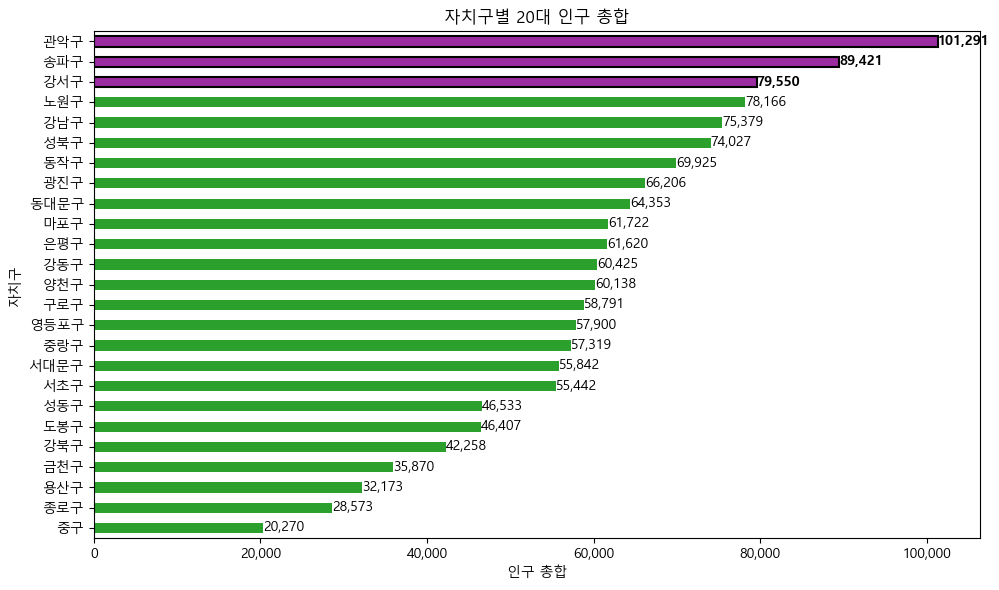

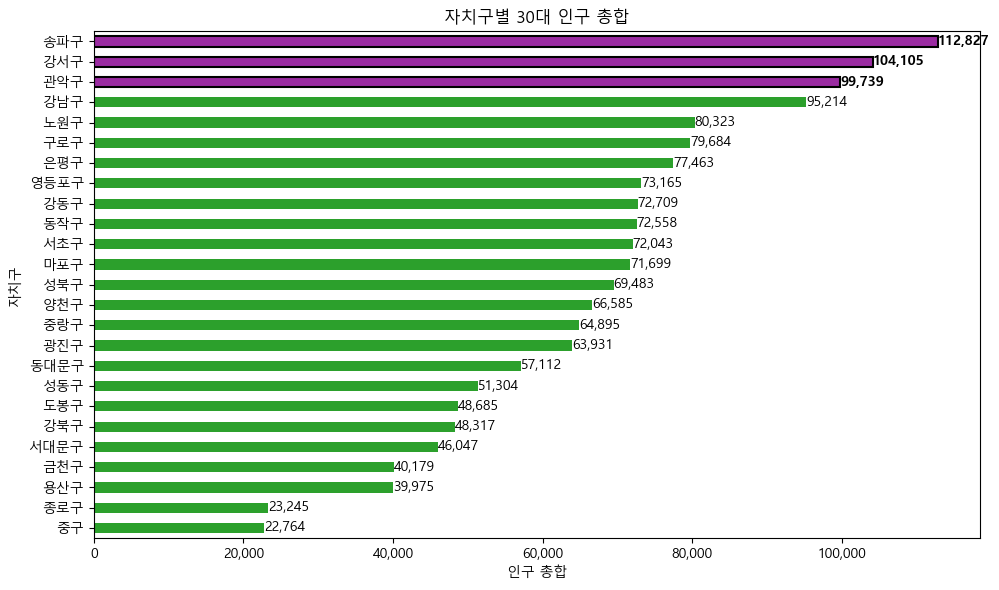

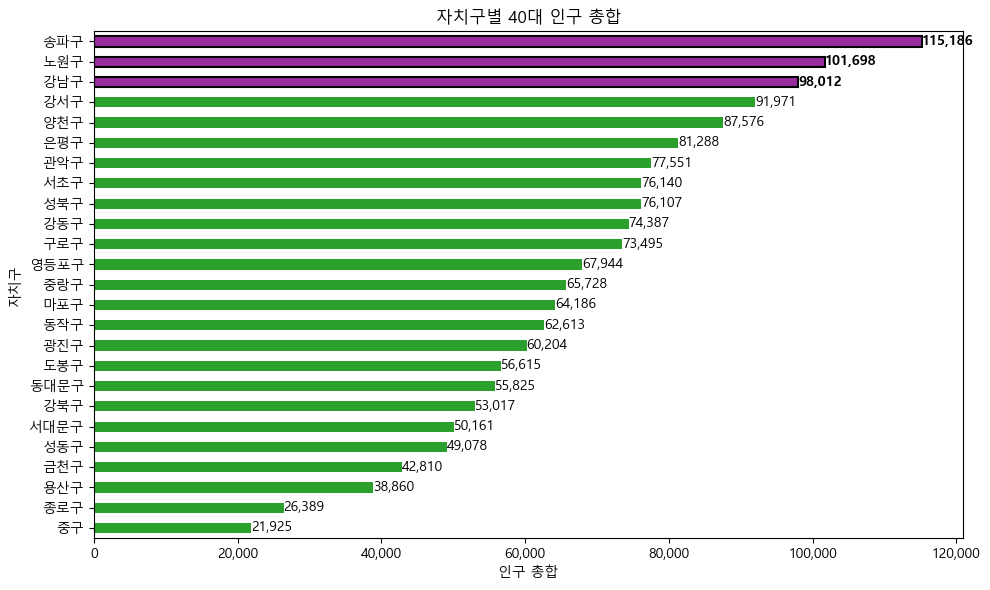

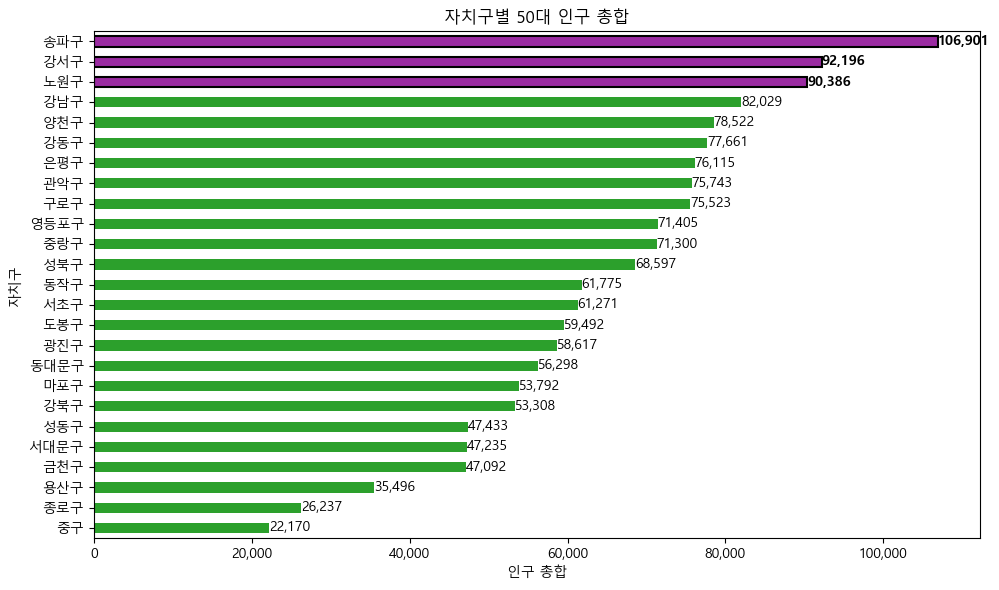

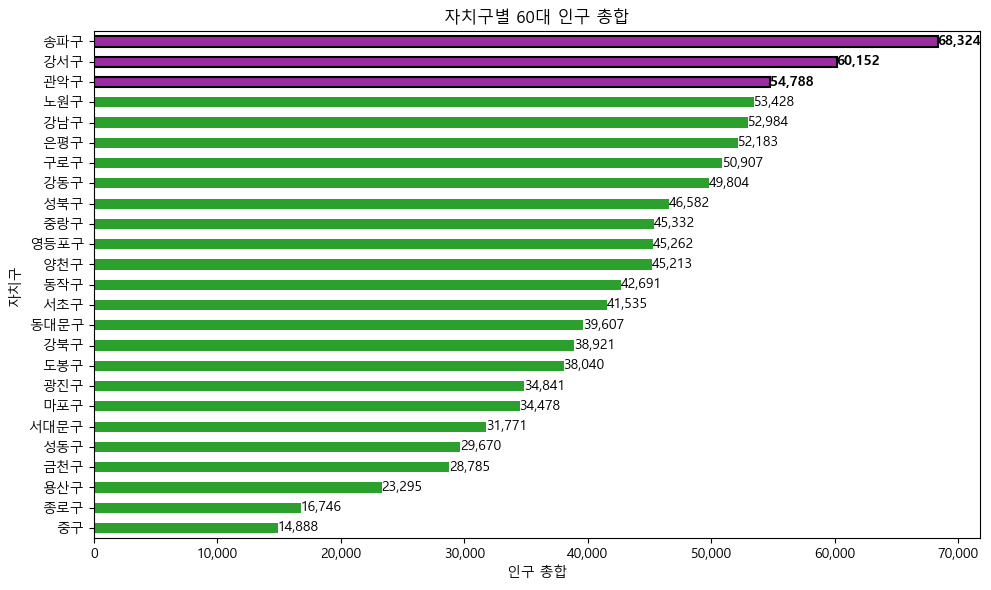

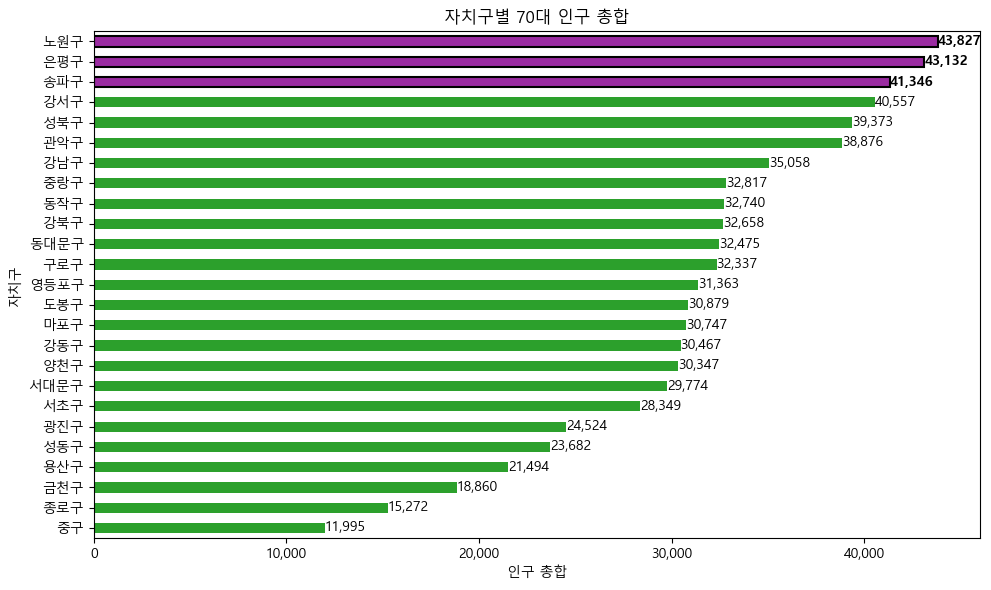

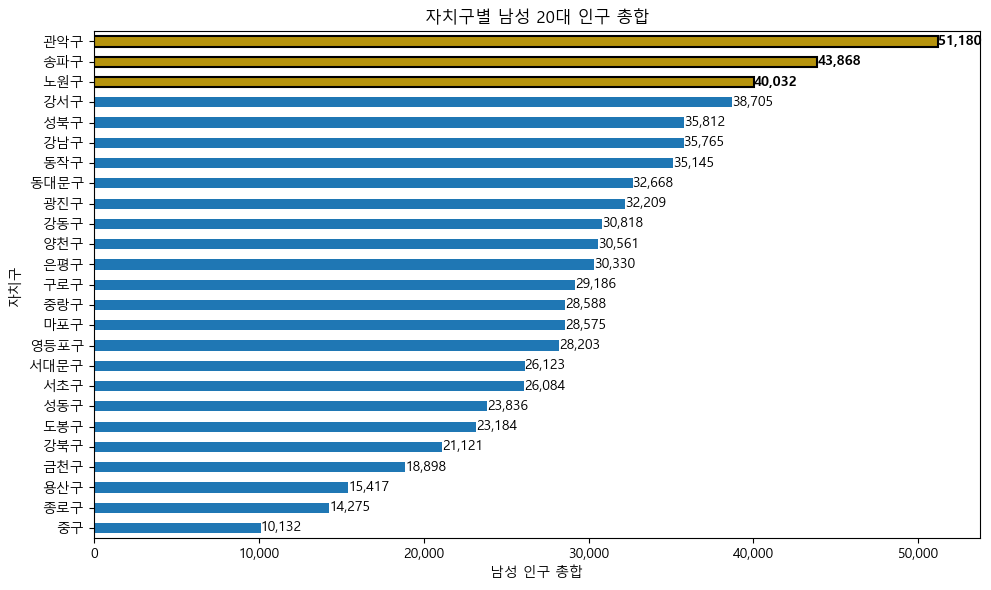

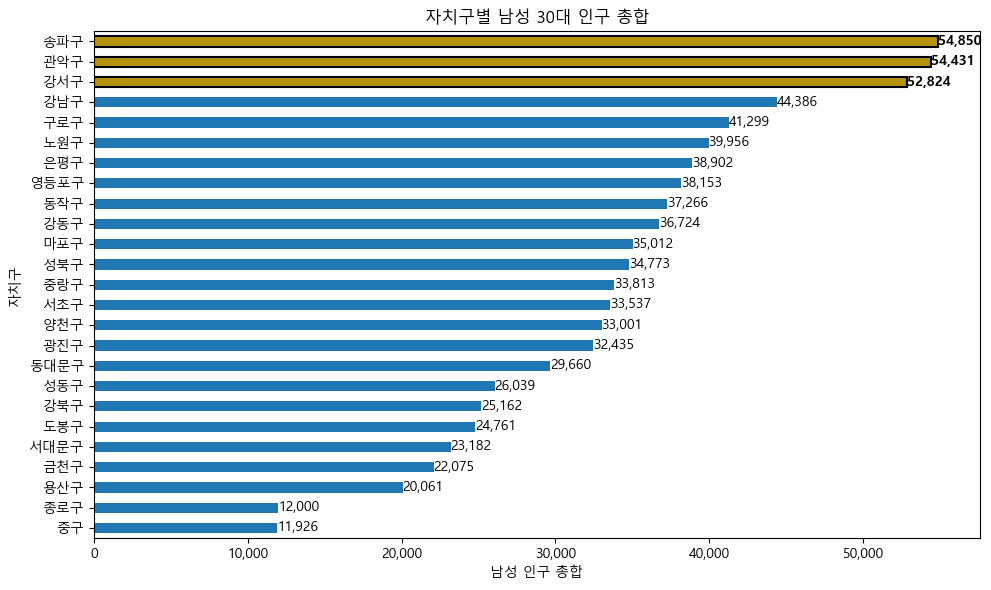

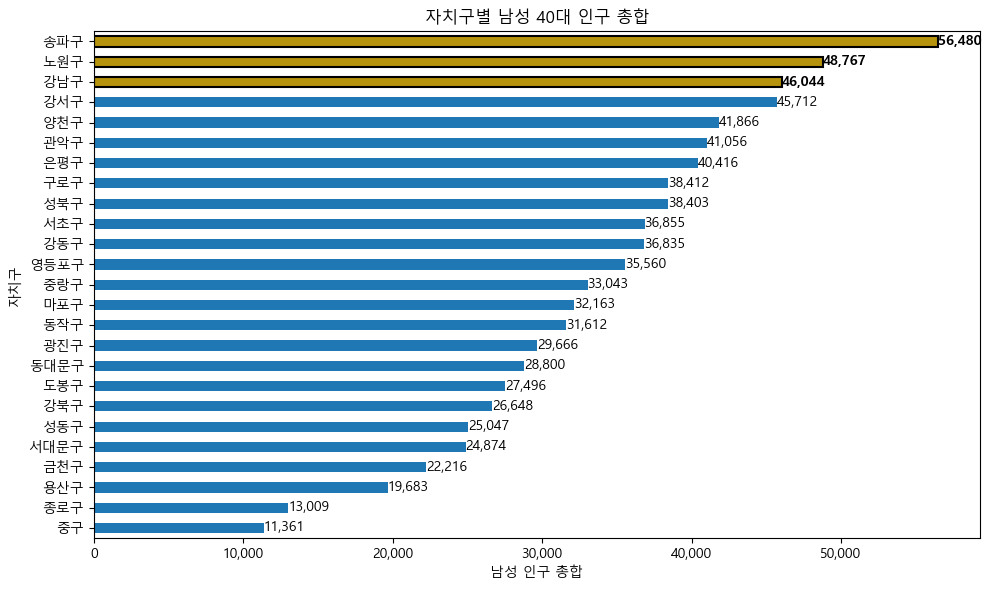

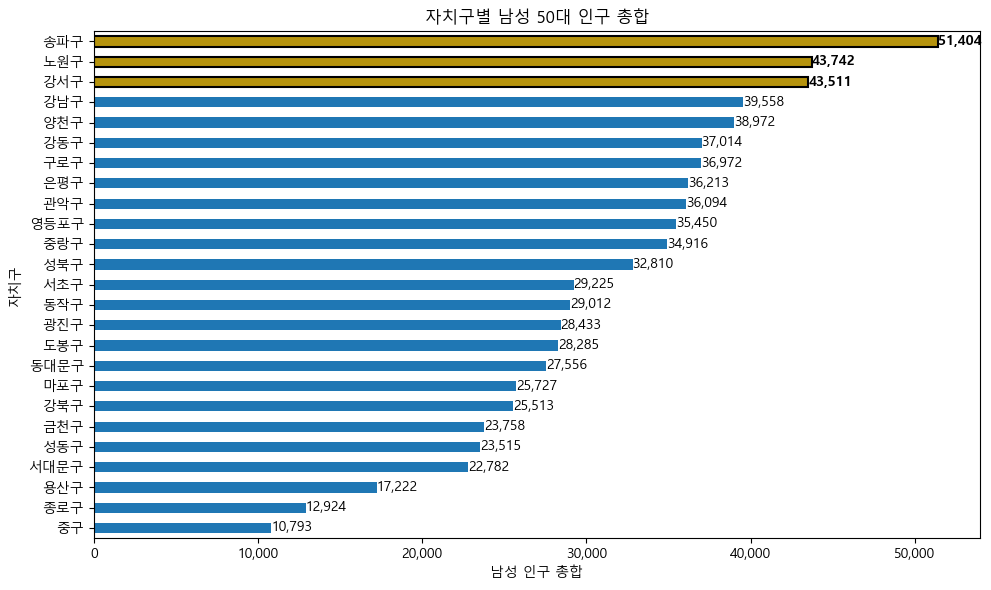

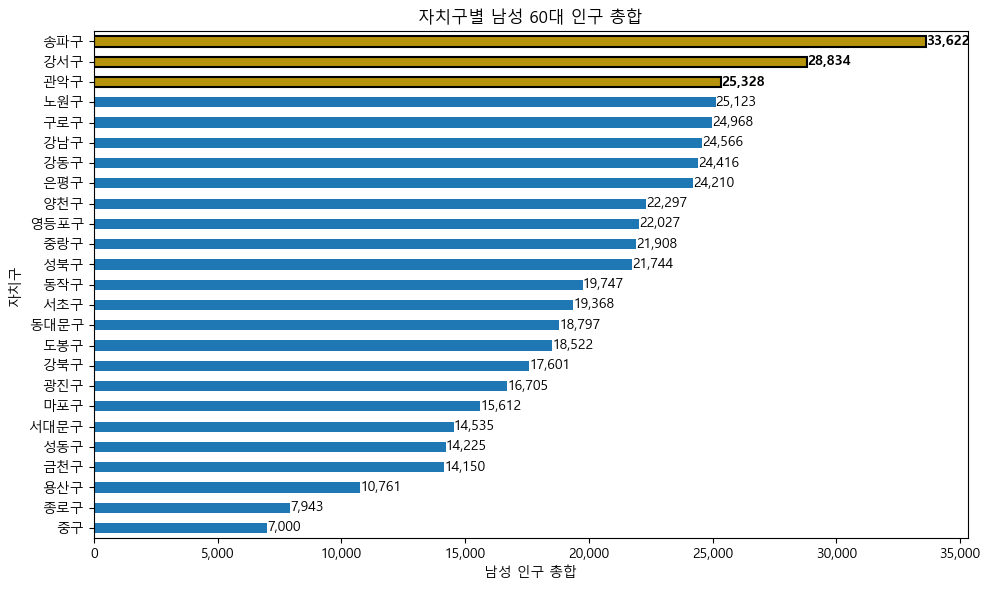

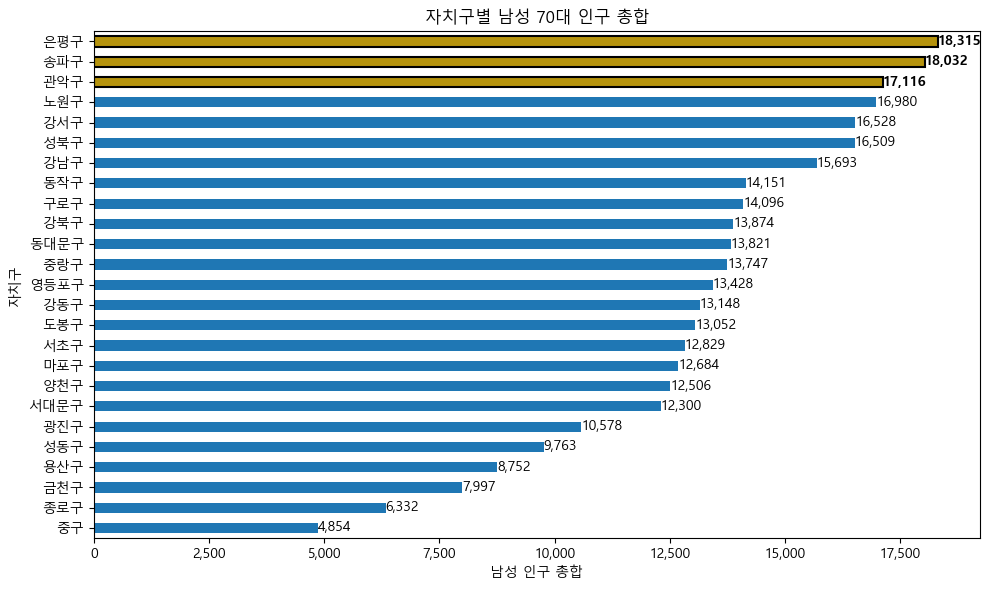

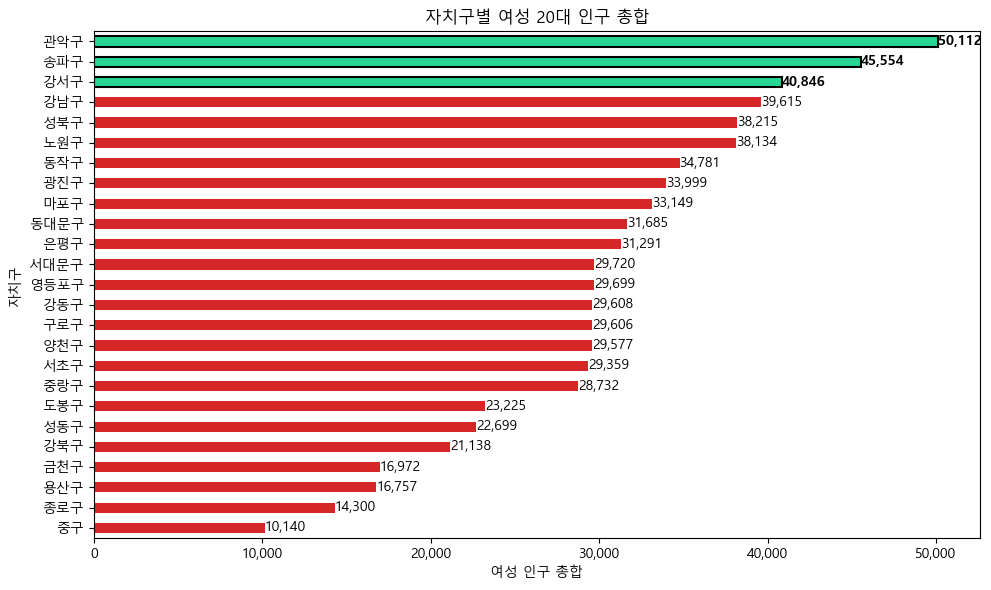

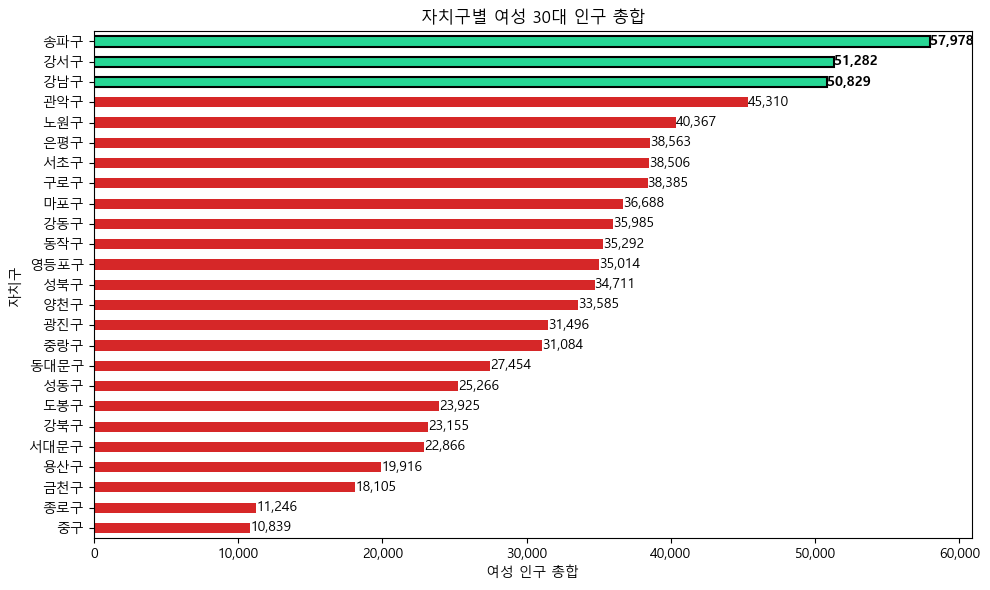

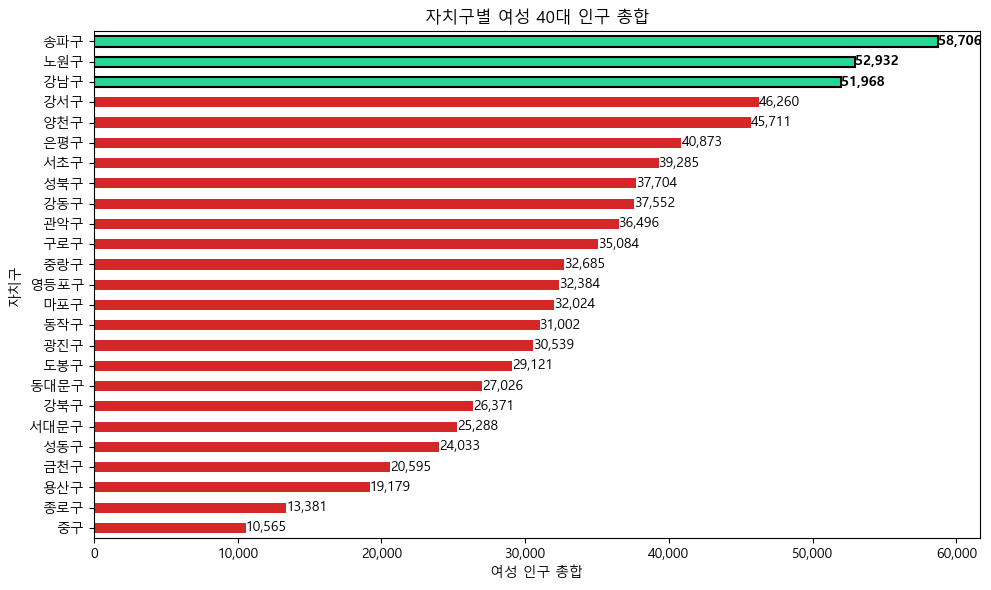

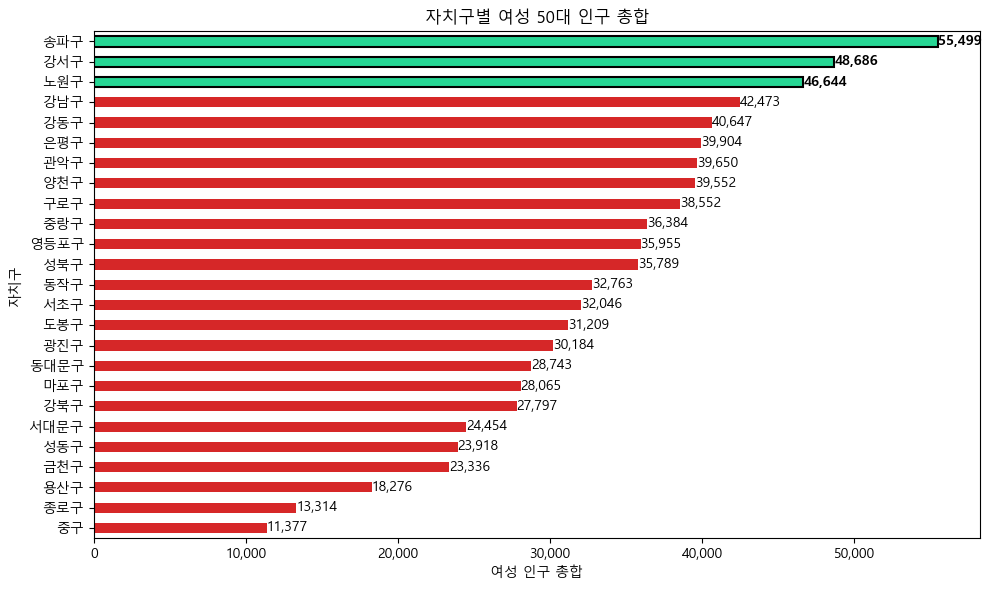

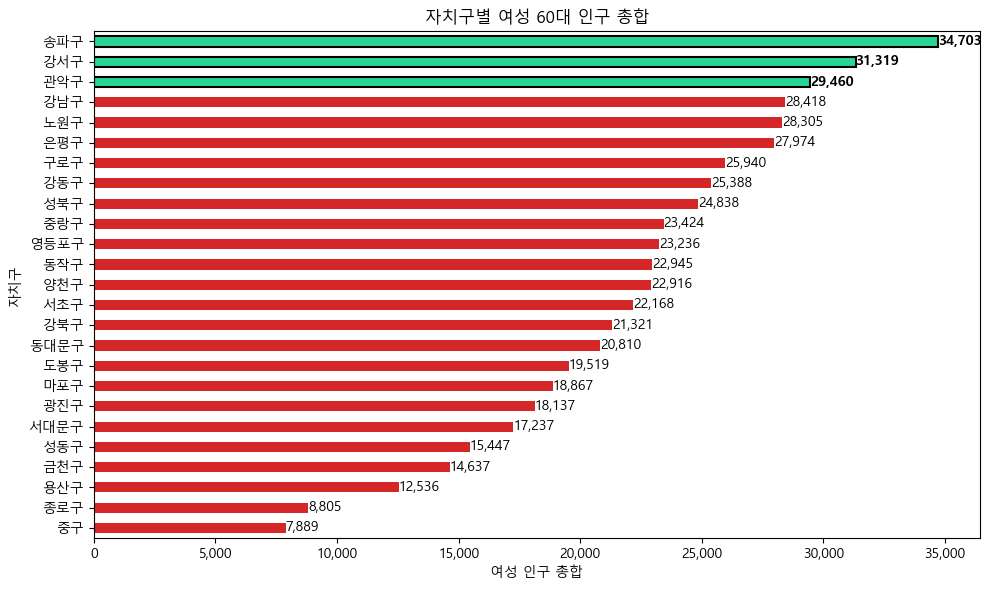

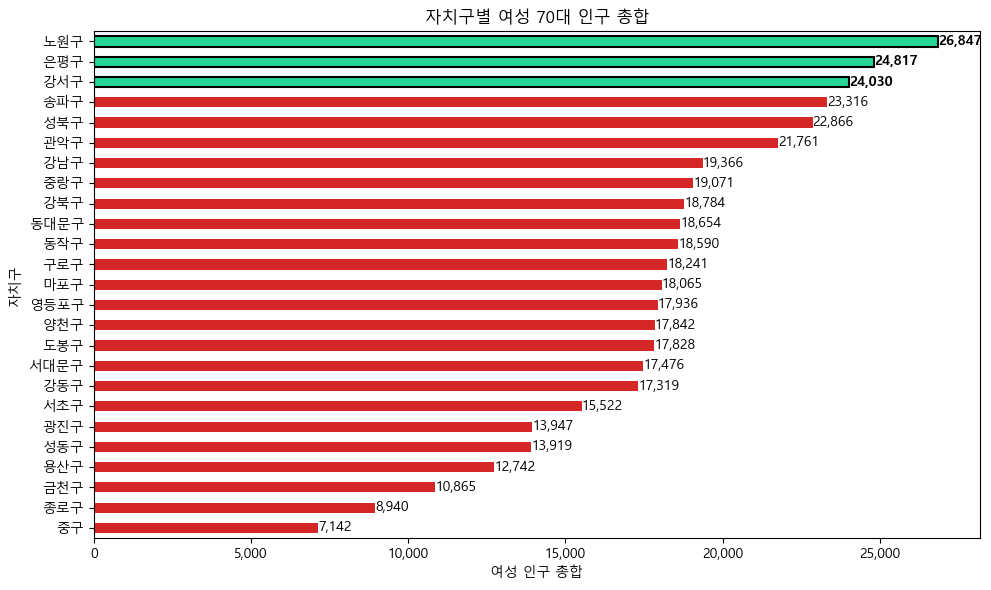

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# 데이터 로드
data_total = age_most_region_total_10
data_sex = age_most_region_sex_10

# 종합 그래프 생성 및 파일로 저장

for age in range(20,71,10):
    age_total_group = data_total[(data_total['연령대'] == age)]
    age_total_by_region = age_total_group.groupby('자치구')['총인구수'].sum()
    age_total_by_region_sorted = age_total_by_region.sort_values() # (ascending=False)

    plt.figure(figsize=(10, 6)),  # 예를 들어, 가로 길이를 14인치로 늘림
    bars = age_total_by_region_sorted.plot(kind='barh', color='tab:green')
    gender_text = '종합'
    plt.title(f'자치구별 {age}대 인구 총합')
    plt.xlabel('인구 총합')
    plt.ylabel('자치구')
    plt.xticks(rotation=0)
    plt.tight_layout()  # 레이아웃 조정
    
    # x축 라벨에 천 단위 구분기호 추가
    plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
    
    for i, bar in enumerate(bars.patches):
        if i > 21:  # 상위 3개에 대해서만
            bar.set_edgecolor('black')  # 바 외곽선 색 변경
            bar.set_linewidth(1.5)  # 바 외곽선 굵기 변경
            bar.set_facecolor('#9A2BA1')  # 상위 3개 바 색 변경
            plt.text(bar.get_width() + 0.1,
                     bar.get_y() + bar.get_height() / 2,  # y 위치를 바의 중간으로 설정
                     f'{bar.get_width():,.0f}',  # 천 단위 구분자 포함
                     ha='left', va='center', fontweight='bold', color='black')
        else:
            plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height() / 2,
                     f'{bar.get_width():,.0f}',
                     ha='left', va='center')
                
# 파일저장    
#     filename_total = f'자치구별 {age}대_인구_총합.png'
#     plt.savefig(filename_total)

    plt.show(); 
    
     
# 성별과 연령대별로 그래프 생성 및 파일로 저장
# 이중 for문으로 남녀 성별 한번에 그래프 해결!
for gender in ['M', 'F']:
    for age in range(20,71,10):
        # 해당 성별과 연령대를 필터링
        age_group = data_sex[(data_sex['성별'] == gender) & (data_sex['연령대'] == age)]

        # 자치구별로 그룹화하여 '성별 인구 총합'을 합산
        age_sex_by_region = age_group.groupby('자치구')['총인구수'].sum()
        
        # 내림차순으로 정렬
        age_sex_by_region_sorted = age_sex_by_region.sort_values() #(ascending=)

        # 그래프 그리기
        plt.figure(figsize=(10, 6)),
        bars = age_sex_by_region_sorted.plot(kind='barh', color='tab:blue' if gender == 'M' else 'tab:red')
        gender_text = '남성' if gender == 'M' else '여성'
        plt.title(f'자치구별 {gender_text} {age}대 인구 총합')
        plt.xlabel(f'{gender_text} 인구 총합')
        plt.ylabel('자치구')
        plt.xticks(rotation=0)
        plt.tight_layout()  # 레이아웃 조정
        
        # x축 라벨에 천 단위 구분기호 추가
        plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
        
        for i, bar in enumerate(bars.patches):
            if i > 21:  # 상위 3개에 대해서만
                bar.set_edgecolor('black')  # 바 외곽선 색 변경
                bar.set_linewidth(1.5)  # 바 외곽선 굵기 변경
                bar.set_facecolor('#B5930D' if gender == 'M' else '#27D694')  # 상위 3개 바 색 변경
                plt.text(bar.get_width() + 0.1,
                         bar.get_y() + bar.get_height() / 2,  # y 위치를 바의 중간으로 설정
                         f'{bar.get_width():,.0f}',  # 천 단위 구분자 포함
                         ha='left', va='center', fontweight='bold', color='black')
            else:
                plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height() / 2,
                         f'{bar.get_width():,.0f}',
                         ha='left', va='center')
            
        # 파일로 저장
#         filename_sex = f'자치구별_{gender_text}_{age}대_인구_총합.png'
#         plt.savefig(filename_sex)        

        plt.show(); 


1;  # 마지막에 의미 없는 표현식 추가, 필요없는 문구 출력 방지

## 2) 자치구별 평균 연령대(지도 시각화)

In [49]:
import folium
import json
import re
from folium.features import DivIcon

geo_json = 'https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json'

# 연령대 소수점 두번째 자리에서 반올림
average_age_total['평균 연령대'] = average_age_total['평균 연령대'].round(1)

male_data = average_age_sex[average_age_sex['성별'] == 'M']
male_data['평균 연령대'] = male_data['평균 연령대'].round(1)

female_data = average_age_sex[average_age_sex['성별'] == 'F']
female_data['평균 연령대'] = female_data['평균 연령대'].round(1)

# 종합 지도 생성
seoul_map_total = folium.Map(
    location=[37.566345, 126.977893],
    zoom_start=10.5)

folium.Choropleth(
    geo_data=geo_json,
    name='choropleth_total',
    data=average_age_total,
    columns=['자치구', '평균 연령대'],
    key_on='feature.properties.name',
    fill_color='YlGn', 
    fill_opacity=0.7,
    line_opacity=1,
    line_weight=1.5,
    line_color='#000',
    legend_name='자치구별 종합 평균 연령대', 
).add_to(seoul_map_total)

# 남성 지도 생성
seoul_map_male = folium.Map(
    location=[37.566345, 126.977893],
    zoom_start=10.5)

folium.Choropleth(
    geo_data=geo_json,
    name='choropleth_male',
    data=male_data,
    columns=['자치구', '평균 연령대'],
    key_on='feature.properties.name',
    fill_color='Blues', 
    fill_opacity=0.7,
    line_opacity=1,
    line_weight=1.5,
    line_color='#000',
    legend_name='자치구별 남성 평균 연령대', 
).add_to(seoul_map_male)

# 여성 지도 생성
seoul_map_female = folium.Map(
    location=[37.566345, 126.977893],
    zoom_start=10.5)

folium.Choropleth(
    geo_data=geo_json,
    name='choropleth_female',
    data=female_data,
    columns=['자치구', '평균 연령대'],
    key_on='feature.properties.name',
    fill_color='Oranges',  
    fill_opacity=0.7,
    line_opacity=1,
    line_weight=1.5,
    line_color='#000',
    legend_name='자치구별 여성 평균 연령대', 
).add_to(seoul_map_female)


# 자치구명과 평균연령 표시
coordinates = {'종로구': (37.59491732, 126.9773213),
               '중구': (37.56014356, 126.9959681),
               '용산구': (37.53138497, 126.979907),
               '성동구': (37.55102969, 127.0410585),
               '광진구': (37.54670608, 127.0857435),
               '동대문구': (37.58195655, 127.0548481),
               '중랑구': (37.59780259, 127.0928803),
               '성북구': (37.6057019, 127.0175795),
               '강북구': (37.64347391, 127.011189),
               '도봉구': (37.66910208, 127.0323688),
               '노원구': (37.65251105, 127.0750347),
               '은평구': (37.61921128, 126.9270229),
               '서대문구': (37.57778531, 126.9390631),
               '마포구': (37.55931349, 126.90827),
               '양천구': (37.52478941, 126.8554777),
               '강서구': (37.56123543, 126.822807),
               '구로구': (37.49440543, 126.8563006),
               '금천구': (37.46056756, 126.9008202),
               '영등포구': (37.52230829, 126.9101695),
               '동작구': (37.49887688, 126.9516415),
               '관악구': (37.46737569, 126.9453372),
               '서초구': (37.47329547, 127.0312203),
               '강남구': (37.49664389, 127.0629852),
               '송파구': (37.50561924, 127.115295),
               '강동구': (37.55045024, 127.1470118)}

# 종합 지도에 각 자치구별 평균 연령대 마커 추가
for index, row in average_age_total.iterrows():
    district_name = row['자치구']
    age_avg = row['평균 연령대']
    if district_name in coordinates:
        folium.Marker(
            location=coordinates[district_name], 
            icon=DivIcon(
                icon_size=(150,36),  
                icon_anchor=(75,20), 
                html=f'<div style="font-size: 10pt; text-align: center;">{district_name}<br>{age_avg}세</div>',
            )
        ).add_to(seoul_map_total);


# 남성 지도에 각 자치구별 평균 연령대 마커 추가
for index, row in male_data.iterrows():
    district_name = row['자치구']
    age_avg = row['평균 연령대']
    if district_name in coordinates:
        folium.Marker(
            location=coordinates[district_name], 
            icon=DivIcon(
                icon_size=(150,36),  
                icon_anchor=(75,20), 
                html=f'<div style="font-size: 10pt; text-align: center;">{district_name}<br>{age_avg}세</div>',
            )
        ).add_to(seoul_map_male);

# 여성 지도에 각 자치구별 평균 연령대 마커 추가
for index, row in female_data.iterrows():
    district_name = row['자치구']
    age_avg = row['평균 연령대']
    if district_name in coordinates:
        folium.Marker(
            location=coordinates[district_name], 
            icon=DivIcon(
                icon_size=(150,36), 
                icon_anchor=(75,20), 
                html=f'<div style="font-size: 10pt; text-align: center;">{district_name}<br>{age_avg}세</div>',
            )
        ).add_to(seoul_map_female);


# 지도 생성
seoul_map_total
seoul_map_male
seoul_map_female

# 지도 출력
# seoul_map_total.save('seoul_map_total.html')
# seoul_map_male.save('seoul_map_male.html')
# seoul_map_female.save('seoul_map_female.html')

C:\Users\chm44\AppData\Local\Temp\ipykernel_77140\3682290562.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  male_data['평균 연령대'] = male_data['평균 연령대'].round(1)
C:\Users\chm44\AppData\Local\Temp\ipykernel_77140\3682290562.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  female_data['평균 연령대'] = female_data['평균 연령대'].round(1)


## 3) 남녀 연령대별 서비스 상관관계(히트맵)

In [50]:
average_df_col_hit = average_df_col
average_df_col_hit['10단위 연령대'] = average_df_col_hit['연령대'].apply(merge_age) # 10단위 연령대 컬럼 생성

from sklearn.preprocessing import StandardScaler

average_df_col_hit

C:\Users\chm44\AppData\Local\Temp\ipykernel_77140\817470886.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  average_df_col_hit['10단위 연령대'] = average_df_col_hit['연령대'].apply(merge_age) # 10단위 연령대 컬럼 생성


자치구 성별  연령대         총인구수  게임 서비스 사용일수  금융 서비스 사용일수  배달 서비스 사용일수  \
0      강남구  F   20   582.925556    39.686667    79.526667    11.141111   
1      강남구  F   25   602.852222    44.793333    97.361111    16.495556   
2      강남구  F   30   458.930000    39.816667   106.191111    15.728889   
3      강남구  F   35   352.687778    35.945556   119.805556    14.350000   
4      강남구  F   40   398.371111    42.202222    99.033333    14.900000   
...    ... ..  ...          ...          ...          ...          ...   
10171  중랑구  M   55  1401.283333    51.075556    70.198889    10.894444   
10172  중랑구  M   60   966.955556    47.791111    50.937778     9.208889   
10173  중랑구  M   65   717.738889    43.452222    42.567778    10.006667   
10174  중랑구  M   70   451.097778    36.500000    26.900000    12.422222   
10175  중랑구  M   75   643.733333    31.674444    19.671111    20.338889   

       쇼핑 서비스 사용일수  동영상/방송 서비스 사용일수  넷플릭스 사용일수  유튜브 사용일수  10단위 연령대  
0       134.943333        29.418889  -0.082222  0.137778        20  
1       149.551111        33.026667  -0.037778  0.158889        20  
2       190.410000        33.768889  -0.097778  0.135556        30  
3       225.784444        37.581111  -0.071111  0.022222        30  
4       192.226667        31.502222  -0.208889  0.018889        40  
...            ...              ...        ...       ...       ...  
10171    99.160000        25.616667  -0.578889 -0.024444        50  
10172    73.138889        21.291111  -0.605556 -0.095556        60  
10173    58.428889        18.103333  -0.636667 -0.135556        60  
10174    38.092222        12.368889  -0.654444 -0.222222        70  
10175    23.063333        11.596667  -0.660000 -0.508889        70  

[10176 rows x 12 columns]

StandardScaler()

<Figure size 1000x800 with 0 Axes>

<Axes: >

Text(0.5, 1.0, '20대의 각 서비스 별 상관관계')

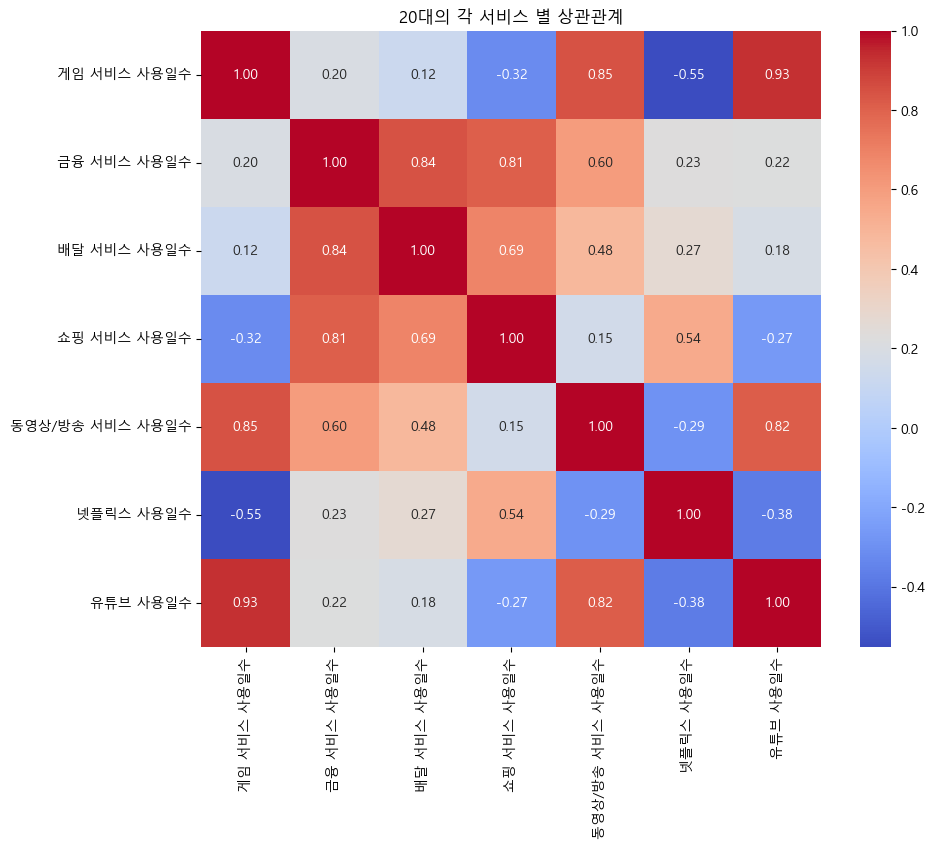

StandardScaler()

<Figure size 1000x800 with 0 Axes>

<Axes: >

Text(0.5, 1.0, '30대의 각 서비스 별 상관관계')

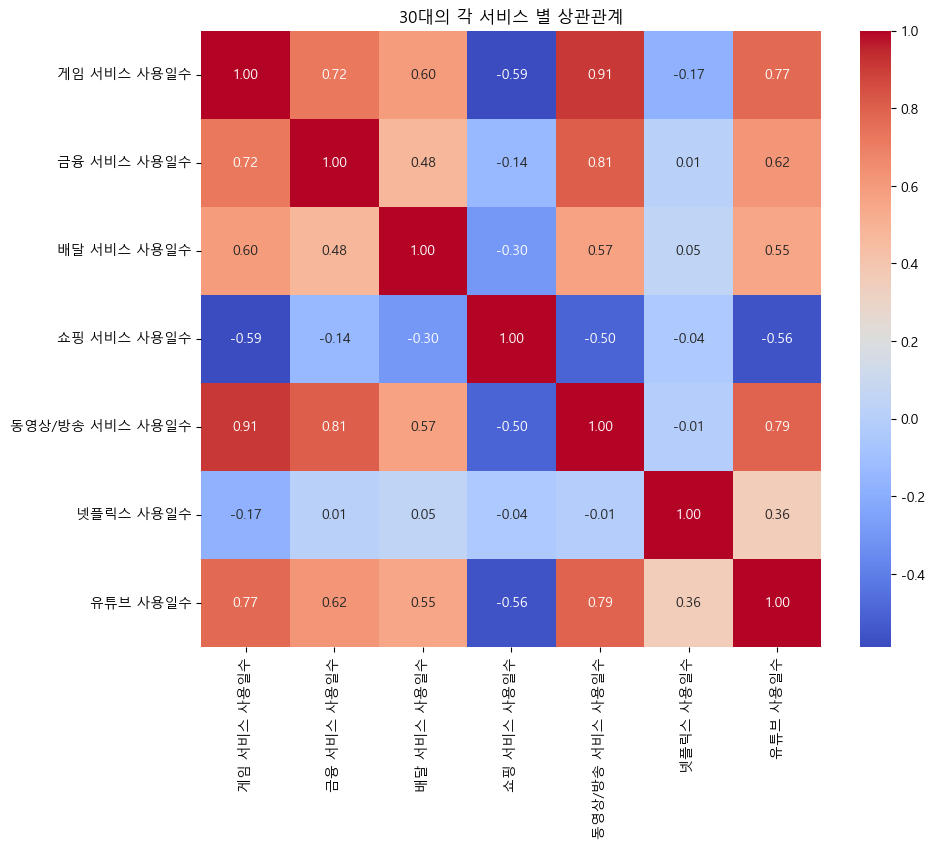

StandardScaler()

<Figure size 1000x800 with 0 Axes>

<Axes: >

Text(0.5, 1.0, '40대의 각 서비스 별 상관관계')

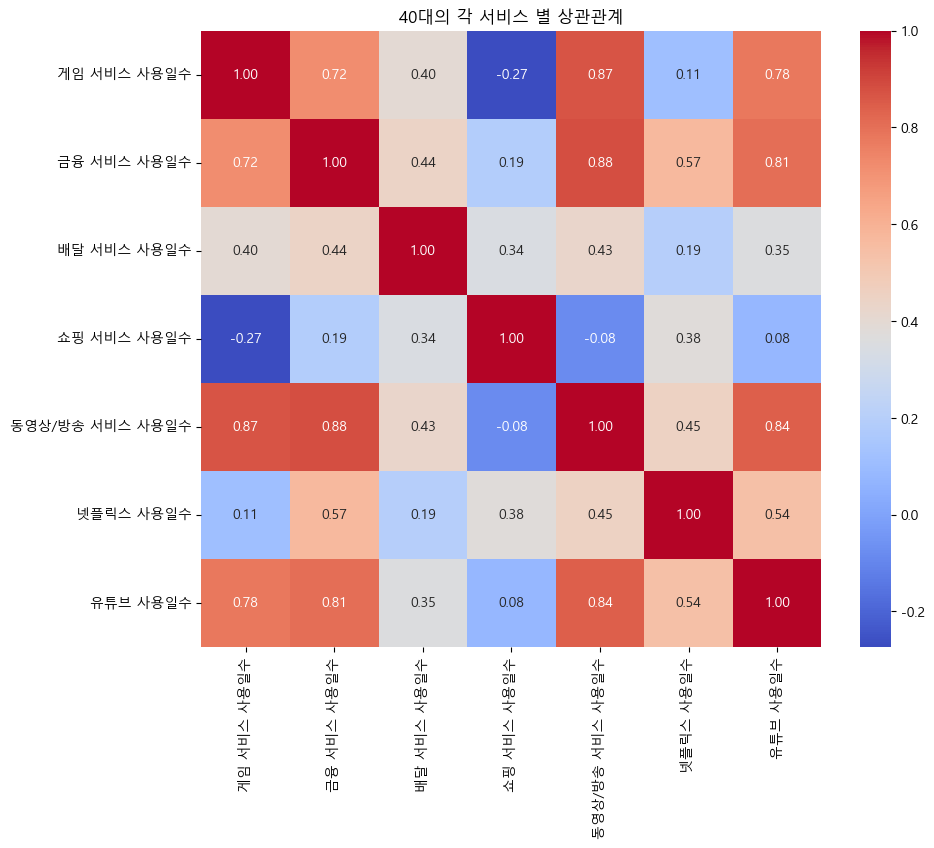

StandardScaler()

<Figure size 1000x800 with 0 Axes>

<Axes: >

Text(0.5, 1.0, '50대의 각 서비스 별 상관관계')

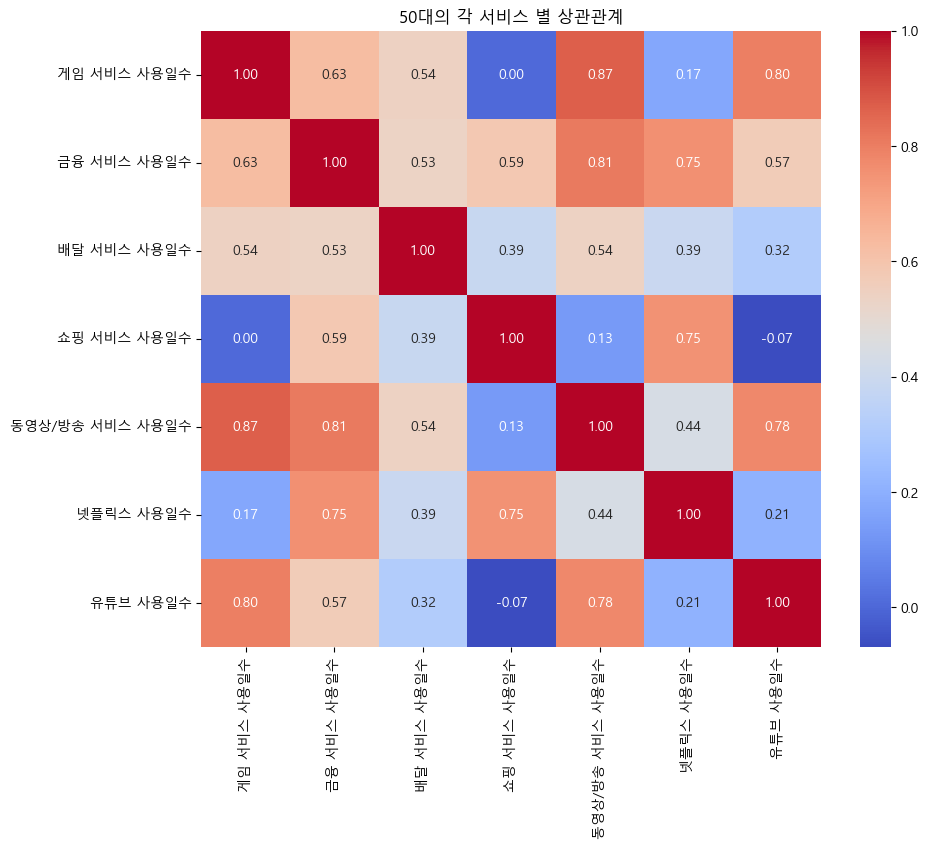

StandardScaler()

<Figure size 1000x800 with 0 Axes>

<Axes: >

Text(0.5, 1.0, '60대의 각 서비스 별 상관관계')

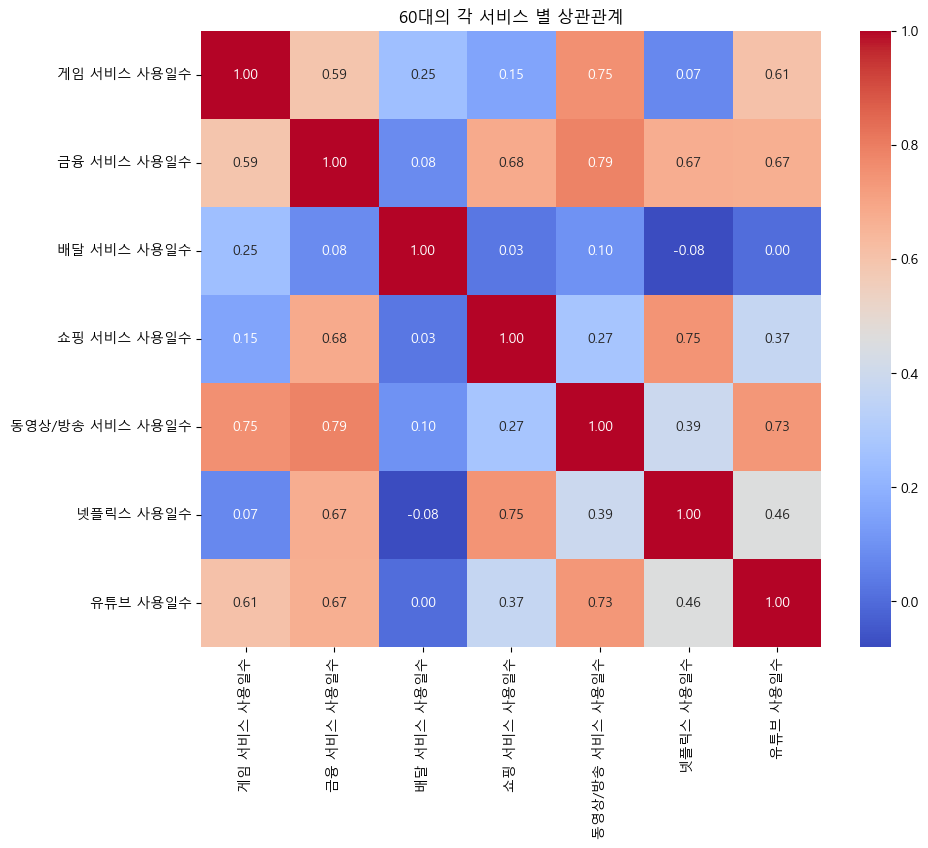

StandardScaler()

<Figure size 1000x800 with 0 Axes>

<Axes: >

Text(0.5, 1.0, '70대의 각 서비스 별 상관관계')

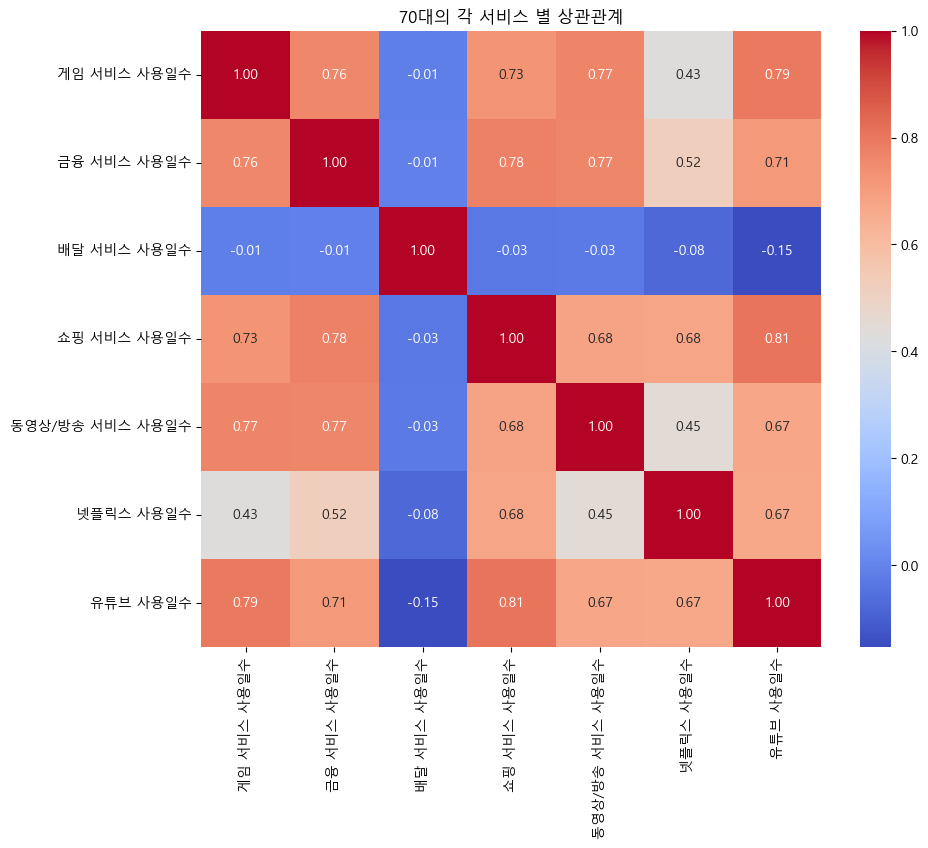

In [51]:
for i in range(2, 8):
    age = average_df_col_hit[average_df_col['10단위 연령대'] == i * 10]

    scaler = StandardScaler()
    
    sv = age[['게임 서비스 사용일수', '금융 서비스 사용일수','배달 서비스 사용일수',
              '쇼핑 서비스 사용일수','동영상/방송 서비스 사용일수','넷플릭스 사용일수','유튜브 사용일수']]
    scaler.fit(sv)

    # 상관계수
    corr_mat = sv.corr()
    
    # plot
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_mat, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('{}0대의 각 서비스 별 상관관계'.format(i))
    plt.show()

---

---

# 4. 데이터 모델링 

## 1) 추천 시스템

### (1) 시스템 1 : 고객별 맞춤형 광고 알고리즘

#### 고객의 자치구, 성별, 연령대 값을 넣었을 때 1~7순위 서비스 분야 광고 추천이 나오는게 최종 목적
- input : 자치구, 성별, 연령대 > output : 1~7순위 서비스분야 광고 추천 경우의수 : 2526 = 300개
- 엑셀 출력 행 강남구 여성 20대 ~ 중구 남성 70대 , 열 1~7 : 내용은 각각 다름

In [52]:
# data = pd.read_excel('./region_age_sex_services.xlsx', index_col = False)
data = region_sex_age_services

service_columns = ['게임 서비스 사용일수', '금융 서비스 사용일수', '쇼핑 서비스 사용일수',
                   '동영상/방송 서비스 사용일수', '유튜브 사용일수', '넷플릭스 사용일수',
                   '배달 서비스 사용일수']

df = pd.DataFrame()

df['자치구'] = data['자치구']
df['연령대'] = data['연령대']
df['성별'] = data['성별']
df['1'] = 'service 1'
df['2'] = 'service 2'
df['3'] = 'service 3'
df['4'] = 'service 4'
df['5'] = 'service 5'
df['6'] = 'service 6'
df['7'] = 'service 7'

for i in range(300):
    row = data.loc[[i]]
    priority = []
    for col in service_columns:
        priority.append([float(row[col]), col])
    priority = pd.DataFrame(priority)
    priority = priority.sort_values(by = 0, ascending=False)
    priority = priority.reset_index(drop=True)

    df.loc[i, '1'] = priority.loc[0][1][:-5]
    df.loc[i, '2'] = priority.loc[1][1][:-5]
    df.loc[i, '3'] = priority.loc[2][1][:-5]
    df.loc[i, '4'] = priority.loc[3][1][:-5]
    df.loc[i, '5'] = priority.loc[4][1][:-5]
    df.loc[i, '6'] = priority.loc[5][1][:-5]
    df.loc[i, '7'] = priority.loc[6][1][:-5]

df

# df.to_excel('./services_priority.xlsx')

C:\Users\chm44\AppData\Local\Temp\ipykernel_77140\2737007740.py:25: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  priority.append([float(row[col]), col])
C:\Users\chm44\AppData\Local\Temp\ipykernel_77140\2737007740.py:25: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  priority.append([float(row[col]), col])
C:\Users\chm44\AppData\Local\Temp\ipykernel_77140\2737007740.py:25: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  priority.append([float(row[col]), col])
C:\Users\chm44\AppData\Local\Temp\ipykernel_77140\2737007740.py:25: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  priority.append([float(row[c

C:\Users\chm44\AppData\Local\Temp\ipykernel_77140\2737007740.py:25: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  priority.append([float(row[col]), col])
C:\Users\chm44\AppData\Local\Temp\ipykernel_77140\2737007740.py:25: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  priority.append([float(row[col]), col])
C:\Users\chm44\AppData\Local\Temp\ipykernel_77140\2737007740.py:25: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  priority.append([float(row[col]), col])
C:\Users\chm44\AppData\Local\Temp\ipykernel_77140\2737007740.py:25: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  priority.append([float(row[c

자치구  연령대 성별       1           2           3           4           5  \
0    강남구   20  F    넷플릭스         유튜브      배달 서비스      쇼핑 서비스  동영상/방송 서비스   
1    강남구   30  F    넷플릭스      쇼핑 서비스      배달 서비스      금융 서비스  동영상/방송 서비스   
2    강남구   40  F  쇼핑 서비스        넷플릭스      금융 서비스  동영상/방송 서비스      배달 서비스   
3    강남구   50  F  쇼핑 서비스        넷플릭스      금융 서비스         유튜브  동영상/방송 서비스   
4    강남구   60  F     유튜브      쇼핑 서비스        넷플릭스      게임 서비스      금융 서비스   
..   ...  ... ..     ...         ...         ...         ...         ...   
295  중랑구   30  M  게임 서비스      배달 서비스  동영상/방송 서비스      금융 서비스         유튜브   
296  중랑구   40  M  게임 서비스  동영상/방송 서비스      금융 서비스      쇼핑 서비스      배달 서비스   
297  중랑구   50  M  게임 서비스  동영상/방송 서비스         유튜브      금융 서비스      쇼핑 서비스   
298  중랑구   60  M     유튜브      게임 서비스  동영상/방송 서비스      배달 서비스      금융 서비스   
299  중랑구   70  M  배달 서비스      게임 서비스        넷플릭스  동영상/방송 서비스      금융 서비스   

              6       7  
0        금융 서비스  게임 서비스  
1           유튜브  게임 서비스  
2           유튜브  게임 서비스  
3        게임 서비스  배달 서비스  
4    동영상/방송 서비스  배달 서비스  
..          ...     ...  
295      쇼핑 서비스    넷플릭스  
296         유튜브    넷플릭스  
297      배달 서비스    넷플릭스  
298      쇼핑 서비스    넷플릭스  
299      쇼핑 서비스     유튜브  

[300 rows x 10 columns]

### (2) 시스템 2 : 서비스별 타겟 고객 및 광고 추천 시스템

#### 특정 서비스의 이용수가 가장 많은 타겟 고객의 자치구, 연령대, 성별을 우선순위 순으로 정렬하며, 맞춤형 광고 송출 대상 서비스를 추천하는 것이 최종 목적
- 서비스 분야 결정 : 게임회사가 광고를 하고 싶다. Input : 서비스 분야 > output : 자치구, 성별, 연령대 Z-값끼리의 선호도 확인 > 행끼리 비교, 순위만 알아도 될 듯(내림차순)

In [53]:
# 서비스별로 dataframe 생성
# data = pd.read_excel('./region_sex_age_services.xlsx', index_col = False)
data = region_sex_age_services

game = pd.DataFrame()
game = data.groupby(['자치구', '연령대', '성별'])['게임 서비스 사용일수'].mean()
game = pd.DataFrame(game).reset_index().sort_values(by='게임 서비스 사용일수', ascending=False)
game = game.reset_index(drop=True)
game['1'] = 'service1'
game['2'] = 'service2'
game['3'] = 'service3'
game['4'] = 'service4'
game['5'] = 'service5'
game['6'] = 'service6'
game


finance = pd.DataFrame()
finance = data.groupby(['자치구', '연령대', '성별'])['금융 서비스 사용일수'].mean()
finance = pd.DataFrame(finance).reset_index().sort_values(by='금융 서비스 사용일수', ascending=False)
finance = finance.reset_index(drop=True)
finance['1'] = 'service1'
finance['2'] = 'service2'
finance['3'] = 'service3'
finance['4'] = 'service4'
finance['5'] = 'service5'
finance['6'] = 'service6'
finance


shopping = pd.DataFrame()
shopping = data.groupby(['자치구', '연령대', '성별'])['쇼핑 서비스 사용일수'].mean()
shopping = pd.DataFrame(shopping).reset_index().sort_values(by='쇼핑 서비스 사용일수', ascending=False)
shopping = shopping.reset_index(drop=True)
shopping['1'] = 'service1'
shopping['2'] = 'service2'
shopping['3'] = 'service3'
shopping['4'] = 'service4'
shopping['5'] = 'service5'
shopping['6'] = 'service6'
shopping


video = pd.DataFrame()
video = data.groupby(['자치구', '연령대', '성별'])['동영상/방송 서비스 사용일수'].mean()
video = pd.DataFrame(video).reset_index().sort_values(by='동영상/방송 서비스 사용일수', ascending=False)
video = video.reset_index(drop=True)
video['1'] = 'service1'
video['2'] = 'service2'
video['3'] = 'service3'
video['4'] = 'service4'
video['5'] = 'service5'
video['6'] = 'service6'
video


youtube = pd.DataFrame()
youtube = data.groupby(['자치구', '연령대', '성별'])['유튜브 사용일수'].mean()
youtube = pd.DataFrame(youtube).reset_index().sort_values(by='유튜브 사용일수', ascending=False)
youtube = youtube.reset_index(drop=True)
youtube['1'] = 'service1'
youtube['2'] = 'service2'
youtube['3'] = 'service3'
youtube['4'] = 'service4'
youtube['5'] = 'service5'
youtube['6'] = 'service6'
youtube


netflix = pd.DataFrame()
netflix = data.groupby(['자치구', '연령대', '성별'])['넷플릭스 사용일수'].mean()
netflix = pd.DataFrame(netflix).reset_index().sort_values(by='넷플릭스 사용일수', ascending=False)
netflix = netflix.reset_index(drop=True)
netflix['1'] = 'service1'
netflix['2'] = 'service2'
netflix['3'] = 'service3'
netflix['4'] = 'service4'
netflix['5'] = 'service5'
netflix['6'] = 'service6'
netflix


delivery = pd.DataFrame()
delivery = data.groupby(['자치구', '연령대', '성별'])['배달 서비스 사용일수'].mean()
delivery = pd.DataFrame(delivery).reset_index().sort_values(by='배달 서비스 사용일수', ascending=False)
delivery = delivery.reset_index(drop=True)
delivery['1'] = 'service1'
delivery['2'] = 'service2'
delivery['3'] = 'service3'
delivery['4'] = 'service4'
delivery['5'] = 'service5'
delivery['6'] = 'service6'
delivery

자치구  연령대 성별  게임 서비스 사용일수         1         2         3         4  \
0    금천구   20  M     2.173571  service1  service2  service3  service4   
1    강북구   20  M     2.126360  service1  service2  service3  service4   
2    양천구   20  M     2.120855  service1  service2  service3  service4   
3    구로구   20  M     2.097965  service1  service2  service3  service4   
4    도봉구   20  M     2.076401  service1  service2  service3  service4   
..   ...  ... ..          ...       ...       ...       ...       ...   
295  동작구   70  F    -1.290650  service1  service2  service3  service4   
296  송파구   70  F    -1.292209  service1  service2  service3  service4   
297  강동구   70  F    -1.299832  service1  service2  service3  service4   
298  마포구   70  F    -1.317574  service1  service2  service3  service4   
299  서초구   70  F    -1.318826  service1  service2  service3  service4   

            5         6  
0    service5  service6  
1    service5  service6  
2    service5  service6  
3    service5  service6  
4    service5  service6  
..        ...       ...  
295  service5  service6  
296  service5  service6  
297  service5  service6  
298  service5  service6  
299  service5  service6  

[300 rows x 10 columns]

자치구  연령대 성별  금융 서비스 사용일수         1         2         3         4  \
0    영등포구   30  M     1.621497  service1  service2  service3  service4   
1     강동구   30  M     1.537967  service1  service2  service3  service4   
2     강서구   30  M     1.508728  service1  service2  service3  service4   
3     노원구   30  M     1.481818  service1  service2  service3  service4   
4     구로구   30  M     1.458323  service1  service2  service3  service4   
..    ...  ... ..          ...       ...       ...       ...       ...   
295   광진구   70  F    -1.645110  service1  service2  service3  service4   
296   구로구   70  F    -1.647740  service1  service2  service3  service4   
297  서대문구   70  F    -1.653965  service1  service2  service3  service4   
298   금천구   70  F    -1.655651  service1  service2  service3  service4   
299   종로구   70  F    -1.684233  service1  service2  service3  service4   

            5         6  
0    service5  service6  
1    service5  service6  
2    service5  service6  
3    service5  service6  
4    service5  service6  
..        ...       ...  
295  service5  service6  
296  service5  service6  
297  service5  service6  
298  service5  service6  
299  service5  service6  

[300 rows x 10 columns]

자치구  연령대 성별  쇼핑 서비스 사용일수         1         2         3         4  \
0     중랑구   30  F     1.541880  service1  service2  service3  service4   
1     노원구   30  F     1.520255  service1  service2  service3  service4   
2     도봉구   30  F     1.509519  service1  service2  service3  service4   
3    동대문구   30  F     1.504351  service1  service2  service3  service4   
4    영등포구   30  F     1.490951  service1  service2  service3  service4   
..    ...  ... ..          ...       ...       ...       ...       ...   
295   구로구   70  F    -1.614030  service1  service2  service3  service4   
296  동대문구   70  F    -1.619016  service1  service2  service3  service4   
297   성북구   70  F    -1.620400  service1  service2  service3  service4   
298   중랑구   70  F    -1.634001  service1  service2  service3  service4   
299   금천구   70  F    -1.638939  service1  service2  service3  service4   

            5         6  
0    service5  service6  
1    service5  service6  
2    service5  service6  
3    service5  service6  
4    service5  service6  
..        ...       ...  
295  service5  service6  
296  service5  service6  
297  service5  service6  
298  service5  service6  
299  service5  service6  

[300 rows x 10 columns]

자치구  연령대 성별  동영상/방송 서비스 사용일수         1         2         3         4  \
0     노원구   30  M         1.717026  service1  service2  service3  service4   
1     도봉구   30  M         1.602601  service1  service2  service3  service4   
2    동대문구   30  M         1.581389  service1  service2  service3  service4   
3     강동구   30  M         1.563988  service1  service2  service3  service4   
4     양천구   30  M         1.560458  service1  service2  service3  service4   
..    ...  ... ..              ...       ...       ...       ...       ...   
295  서대문구   70  F        -1.691908  service1  service2  service3  service4   
296   마포구   70  F        -1.702677  service1  service2  service3  service4   
297   성북구   70  F        -1.708508  service1  service2  service3  service4   
298   성동구   70  F        -1.719980  service1  service2  service3  service4   
299   금천구   70  F        -1.723053  service1  service2  service3  service4   

            5         6  
0    service5  service6  
1    service5  service6  
2    service5  service6  
3    service5  service6  
4    service5  service6  
..        ...       ...  
295  service5  service6  
296  service5  service6  
297  service5  service6  
298  service5  service6  
299  service5  service6  

[300 rows x 10 columns]

자치구  연령대 성별  유튜브 사용일수         1         2         3         4         5  \
0    용산구   20  M  1.713183  service1  service2  service3  service4  service5   
1    종로구   20  M  1.689288  service1  service2  service3  service4  service5   
2    광진구   20  M  1.681327  service1  service2  service3  service4  service5   
3    관악구   20  M  1.679408  service1  service2  service3  service4  service5   
4    성북구   20  M  1.673840  service1  service2  service3  service4  service5   
..   ...  ... ..       ...       ...       ...       ...       ...       ...   
295  구로구   70  F -2.153289  service1  service2  service3  service4  service5   
296  성북구   70  F -2.163032  service1  service2  service3  service4  service5   
297  중랑구   70  F -2.201582  service1  service2  service3  service4  service5   
298  강북구   70  F -2.205417  service1  service2  service3  service4  service5   
299  금천구   70  F -2.207809  service1  service2  service3  service4  service5   

            6  
0    service6  
1    service6  
2    service6  
3    service6  
4    service6  
..        ...  
295  service6  
296  service6  
297  service6  
298  service6  
299  service6  

[300 rows x 10 columns]

자치구  연령대 성별  넷플릭스 사용일수         1         2         3         4         5  \
0    광진구   20  F   1.519820  service1  service2  service3  service4  service5   
1    용산구   20  F   1.512595  service1  service2  service3  service4  service5   
2     중구   20  F   1.504741  service1  service2  service3  service4  service5   
3    강동구   20  F   1.483946  service1  service2  service3  service4  service5   
4    마포구   20  F   1.480449  service1  service2  service3  service4  service5   
..   ...  ... ..        ...       ...       ...       ...       ...       ...   
295  중랑구   70  M  -1.328861  service1  service2  service3  service4  service5   
296  구로구   70  F  -1.330286  service1  service2  service3  service4  service5   
297  중랑구   70  F  -1.330880  service1  service2  service3  service4  service5   
298  금천구   70  F  -1.333068  service1  service2  service3  service4  service5   
299  금천구   70  M  -1.334953  service1  service2  service3  service4  service5   

            6  
0    service6  
1    service6  
2    service6  
3    service6  
4    service6  
..        ...  
295  service6  
296  service6  
297  service6  
298  service6  
299  service6  

[300 rows x 10 columns]

자치구  연령대 성별  배달 서비스 사용일수         1         2         3         4  \
0     강북구   30  M     1.984130  service1  service2  service3  service4   
1     관악구   30  M     1.808444  service1  service2  service3  service4   
2     중랑구   30  M     1.808402  service1  service2  service3  service4   
3    동대문구   30  M     1.806163  service1  service2  service3  service4   
4     도봉구   30  M     1.767847  service1  service2  service3  service4   
..    ...  ... ..          ...       ...       ...       ...       ...   
295   서초구   60  F    -1.491626  service1  service2  service3  service4   
296   서초구   70  F    -1.518703  service1  service2  service3  service4   
297   종로구   70  F    -1.654803  service1  service2  service3  service4   
298   종로구   70  M    -1.660171  service1  service2  service3  service4   
299    중구   70  M    -1.897867  service1  service2  service3  service4   

            5         6  
0    service5  service6  
1    service5  service6  
2    service5  service6  
3    service5  service6  
4    service5  service6  
..        ...       ...  
295  service5  service6  
296  service5  service6  
297  service5  service6  
298  service5  service6  
299  service5  service6  

[300 rows x 10 columns]

In [54]:
# 각각의 서비스에 대해서 예를 들면 게임서비스의 타겟 고객층들이 있다면 타겟 고객들별로 게임서비스와 상관관계가 높은 서비스들을 알 수 있다.
# 게임과 상관관계가 높은 순서대로 우선순위를 나열한다.
# average = pd.read_excel('./average.xlsx', index_col=0)
average = average_df[['자치구','행정동','성별','연령대',
                      '게임 서비스 사용일수', '금융 서비스 사용일수','배달 서비스 사용일수','쇼핑 서비스 사용일수',
                      '넷플릭스 사용일수','동영상/방송 서비스 사용일수','유튜브 사용일수']]
# region_age_sex = pd.read_excel('region_age_sex_services.xlsx')
region_age_sex = region_sex_age_services

#### ① 서비스별 코드 반복

In [55]:
# 연령대 합치는 함수 작성 (20대, 30대,,,)
def merge_age(age):
    return age//10 * 10

# 10단위 연령대 컬럼 생성
average['연령대'] = average['연령대'].apply(merge_age)
average = average.groupby(['자치구', '행정동', '성별', '연령대'])[
    ['게임 서비스 사용일수', '금융 서비스 사용일수', '쇼핑 서비스 사용일수', '넷플릭스 사용일수', '동영상/방송 서비스 사용일수', '배달 서비스 사용일수', '유튜브 사용일수']
].mean()
average = average.reset_index()
average = average.sort_values(by=['자치구', '성별', '연령대'])

from sklearn.preprocessing import StandardScaler

# average

for index, row in region_age_sex.iterrows():   # 행들 차례대로 읽기
    df = pd.DataFrame()
    for i in range(5088):  # 자치구, 성별, 연령대 같은 행들을 모아 데이터프레임 생성
        if (average.loc[i]['자치구'] == row['자치구']) & (average.loc[i]['성별'] == row['성별']) & (average.loc[i]['연령대'] == row['연령대']):
            df = pd.concat([df, average.loc[i:i]], ignore_index=True)

    
    scaler = StandardScaler()

    # 자치구, 성별, 연령대가 같은 데이터들에 대해 서비스 사용일수를 이용해 상관계수 구하기
    sv = df[['게임 서비스 사용일수', '금융 서비스 사용일수','쇼핑 서비스 사용일수','넷플릭스 사용일수','동영상/방송 서비스 사용일수','배달 서비스 사용일수','유튜브 사용일수']]
    scaler.fit(sv)

    # 상관계수
    corr_mat = sv.corr()
    corr_mat = corr_mat.loc[['게임 서비스 사용일수']][['금융 서비스 사용일수','쇼핑 서비스 사용일수','동영상/방송 서비스 사용일수', '넷플릭스 사용일수','유튜브 사용일수', '배달 서비스 사용일수']]
    corr_mat = corr_mat.loc['게임 서비스 사용일수'].sort_values(ascending=False)
    corr_mat = pd.DataFrame(corr_mat)
    # corr_mat

    
    for i in range(300):
        if (game.loc[i]['자치구'] == row['자치구']) & (game.loc[i]['연령대'] == row['연령대']) & (game.loc[i]['성별'] == row['성별']):
            # game.loc[i]
            corr_mat.index.values[0]
            game.loc[i,'1'] = corr_mat.index.values[0][:-5]
            game.loc[i,'2'] = corr_mat.index.values[1][:-5]
            game.loc[i,'3'] = corr_mat.index.values[2][:-5]
            game.loc[i,'4'] = corr_mat.index.values[3][:-5]
            game.loc[i,'5'] = corr_mat.index.values[4][:-5]
            game.loc[i,'6'] = corr_mat.index.values[5][:-5]
            

game.to_excel('./service_target/game.xlsx')

C:\Users\chm44\AppData\Local\Temp\ipykernel_77140\1229693272.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  average['연령대'] = average['연령대'].apply(merge_age)


StandardScaler()

'금융 서비스 사용일수'

StandardScaler()

'금융 서비스 사용일수'

StandardScaler()

'금융 서비스 사용일수'

StandardScaler()

'금융 서비스 사용일수'

StandardScaler()

'배달 서비스 사용일수'

StandardScaler()

'동영상/방송 서비스 사용일수'

StandardScaler()

'쇼핑 서비스 사용일수'

StandardScaler()

'유튜브 사용일수'

StandardScaler()

'쇼핑 서비스 사용일수'

StandardScaler()

'쇼핑 서비스 사용일수'

StandardScaler()

'쇼핑 서비스 사용일수'

StandardScaler()

'쇼핑 서비스 사용일수'

StandardScaler()

'동영상/방송 서비스 사용일수'

StandardScaler()

'배달 서비스 사용일수'

StandardScaler()

'배달 서비스 사용일수'

StandardScaler()

'동영상/방송 서비스 사용일수'

StandardScaler()

'동영상/방송 서비스 사용일수'

StandardScaler()

'동영상/방송 서비스 사용일수'

StandardScaler()

'유튜브 사용일수'

StandardScaler()

'배달 서비스 사용일수'

StandardScaler()

'배달 서비스 사용일수'

StandardScaler()

'배달 서비스 사용일수'

StandardScaler()

'배달 서비스 사용일수'

StandardScaler()

'넷플릭스 사용일수'

StandardScaler()

'동영상/방송 서비스 사용일수'

StandardScaler()

'배달 서비스 사용일수'

StandardScaler()

'동영상/방송 서비스 사용일수'

StandardScaler()

'동영상/방송 서비스 사용일수'

StandardScaler()

'동영상/방송 서비스 사용일수'

StandardScaler()

'금융 서비스 사용일수'

StandardScaler()

'금융 서비스 사용일수'

StandardScaler()

'배달 서비스 사용일수'

StandardScaler()

'유튜브 사용일수'

StandardScaler()

'유튜브 사용일수'

StandardScaler()

'유튜브 사용일수'

StandardScaler()

'쇼핑 서비스 사용일수'

StandardScaler()

'배달 서비스 사용일수'

StandardScaler()

'배달 서비스 사용일수'

StandardScaler()

'배달 서비스 사용일수'

StandardScaler()

'배달 서비스 사용일수'

StandardScaler()

'배달 서비스 사용일수'

StandardScaler()

'동영상/방송 서비스 사용일수'

StandardScaler()

'유튜브 사용일수'

StandardScaler()

'배달 서비스 사용일수'

StandardScaler()

'유튜브 사용일수'

StandardScaler()

'유튜브 사용일수'

StandardScaler()

'유튜브 사용일수'

StandardScaler()

'쇼핑 서비스 사용일수'

StandardScaler()

'동영상/방송 서비스 사용일수'

StandardScaler()

'배달 서비스 사용일수'

StandardScaler()

'금융 서비스 사용일수'

StandardScaler()

'배달 서비스 사용일수'

StandardScaler()

'배달 서비스 사용일수'

StandardScaler()

'동영상/방송 서비스 사용일수'

StandardScaler()

'동영상/방송 서비스 사용일수'

StandardScaler()

'유튜브 사용일수'

StandardScaler()

'유튜브 사용일수'

StandardScaler()

'유튜브 사용일수'

StandardScaler()

'유튜브 사용일수'

StandardScaler()

'쇼핑 서비스 사용일수'

StandardScaler()

'배달 서비스 사용일수'

StandardScaler()

'배달 서비스 사용일수'

StandardScaler()

'배달 서비스 사용일수'

StandardScaler()

'동영상/방송 서비스 사용일수'

StandardScaler()

'배달 서비스 사용일수'

StandardScaler()

'배달 서비스 사용일수'

StandardScaler()

'동영상/방송 서비스 사용일수'

StandardScaler()

'배달 서비스 사용일수'

StandardScaler()

'쇼핑 서비스 사용일수'

StandardScaler()

'유튜브 사용일수'

StandardScaler()

'배달 서비스 사용일수'

StandardScaler()

'넷플릭스 사용일수'

StandardScaler()

'금융 서비스 사용일수'

StandardScaler()

'배달 서비스 사용일수'

StandardScaler()

'배달 서비스 사용일수'

StandardScaler()

'유튜브 사용일수'

StandardScaler()

'배달 서비스 사용일수'

StandardScaler()

'동영상/방송 서비스 사용일수'

StandardScaler()

'유튜브 사용일수'

StandardScaler()

'배달 서비스 사용일수'

StandardScaler()

'쇼핑 서비스 사용일수'

StandardScaler()

'유튜브 사용일수'

StandardScaler()

'배달 서비스 사용일수'

StandardScaler()

'금융 서비스 사용일수'

StandardScaler()

'동영상/방송 서비스 사용일수'

StandardScaler()

'배달 서비스 사용일수'

StandardScaler()

'동영상/방송 서비스 사용일수'

StandardScaler()

'배달 서비스 사용일수'

StandardScaler()

'배달 서비스 사용일수'

StandardScaler()

'쇼핑 서비스 사용일수'

StandardScaler()

'유튜브 사용일수'

StandardScaler()

'유튜브 사용일수'

StandardScaler()

'유튜브 사용일수'

StandardScaler()

'배달 서비스 사용일수'

StandardScaler()

'유튜브 사용일수'

StandardScaler()

'유튜브 사용일수'

StandardScaler()

'배달 서비스 사용일수'

StandardScaler()

'배달 서비스 사용일수'

StandardScaler()

'배달 서비스 사용일수'

StandardScaler()

'동영상/방송 서비스 사용일수'

StandardScaler()

'유튜브 사용일수'

StandardScaler()

'금융 서비스 사용일수'

StandardScaler()

'동영상/방송 서비스 사용일수'

StandardScaler()

'배달 서비스 사용일수'

StandardScaler()

'동영상/방송 서비스 사용일수'

StandardScaler()

'배달 서비스 사용일수'

StandardScaler()

'유튜브 사용일수'

StandardScaler()

'쇼핑 서비스 사용일수'

StandardScaler()

'금융 서비스 사용일수'

StandardScaler()

'배달 서비스 사용일수'

StandardScaler()

'배달 서비스 사용일수'

StandardScaler()

'유튜브 사용일수'

StandardScaler()

'배달 서비스 사용일수'

StandardScaler()

'넷플릭스 사용일수'

StandardScaler()

'금융 서비스 사용일수'

StandardScaler()

'배달 서비스 사용일수'

StandardScaler()

'쇼핑 서비스 사용일수'

StandardScaler()

'배달 서비스 사용일수'

StandardScaler()

'유튜브 사용일수'

StandardScaler()

'쇼핑 서비스 사용일수'

StandardScaler()

'동영상/방송 서비스 사용일수'

StandardScaler()

'동영상/방송 서비스 사용일수'

StandardScaler()

'배달 서비스 사용일수'

StandardScaler()

'배달 서비스 사용일수'

StandardScaler()

'금융 서비스 사용일수'

StandardScaler()

'동영상/방송 서비스 사용일수'

StandardScaler()

'동영상/방송 서비스 사용일수'

StandardScaler()

'동영상/방송 서비스 사용일수'

StandardScaler()

'동영상/방송 서비스 사용일수'

StandardScaler()

'쇼핑 서비스 사용일수'

StandardScaler()

'금융 서비스 사용일수'

StandardScaler()

'배달 서비스 사용일수'

StandardScaler()

'유튜브 사용일수'

StandardScaler()

'배달 서비스 사용일수'

StandardScaler()

'배달 서비스 사용일수'

StandardScaler()

'유튜브 사용일수'

StandardScaler()

'동영상/방송 서비스 사용일수'

StandardScaler()

'금융 서비스 사용일수'

StandardScaler()

'쇼핑 서비스 사용일수'

StandardScaler()

'유튜브 사용일수'

StandardScaler()

'유튜브 사용일수'

StandardScaler()

'배달 서비스 사용일수'

StandardScaler()

'유튜브 사용일수'

StandardScaler()

'쇼핑 서비스 사용일수'

StandardScaler()

'금융 서비스 사용일수'

StandardScaler()

'배달 서비스 사용일수'

StandardScaler()

'동영상/방송 서비스 사용일수'

StandardScaler()

'배달 서비스 사용일수'

StandardScaler()

'배달 서비스 사용일수'

StandardScaler()

'배달 서비스 사용일수'

StandardScaler()

'동영상/방송 서비스 사용일수'

StandardScaler()

'쇼핑 서비스 사용일수'

StandardScaler()

'유튜브 사용일수'

StandardScaler()

'유튜브 사용일수'

StandardScaler()

'쇼핑 서비스 사용일수'

StandardScaler()

'동영상/방송 서비스 사용일수'

StandardScaler()

'유튜브 사용일수'

StandardScaler()

'배달 서비스 사용일수'

StandardScaler()

'쇼핑 서비스 사용일수'

StandardScaler()

'유튜브 사용일수'

StandardScaler()

'배달 서비스 사용일수'

StandardScaler()

'쇼핑 서비스 사용일수'

StandardScaler()

'동영상/방송 서비스 사용일수'

StandardScaler()

'동영상/방송 서비스 사용일수'

StandardScaler()

'쇼핑 서비스 사용일수'

StandardScaler()

'쇼핑 서비스 사용일수'

StandardScaler()

'유튜브 사용일수'

StandardScaler()

'쇼핑 서비스 사용일수'

StandardScaler()

'금융 서비스 사용일수'

StandardScaler()

'금융 서비스 사용일수'

StandardScaler()

'금융 서비스 사용일수'

StandardScaler()

'금융 서비스 사용일수'

StandardScaler()

'금융 서비스 사용일수'

StandardScaler()

'금융 서비스 사용일수'

StandardScaler()

'동영상/방송 서비스 사용일수'

StandardScaler()

'쇼핑 서비스 사용일수'

StandardScaler()

'쇼핑 서비스 사용일수'

StandardScaler()

'쇼핑 서비스 사용일수'

StandardScaler()

'유튜브 사용일수'

StandardScaler()

'동영상/방송 서비스 사용일수'

StandardScaler()

'쇼핑 서비스 사용일수'

StandardScaler()

'배달 서비스 사용일수'

StandardScaler()

'배달 서비스 사용일수'

StandardScaler()

'배달 서비스 사용일수'

StandardScaler()

'배달 서비스 사용일수'

StandardScaler()

'금융 서비스 사용일수'

StandardScaler()

'유튜브 사용일수'

StandardScaler()

'배달 서비스 사용일수'

StandardScaler()

'쇼핑 서비스 사용일수'

StandardScaler()

'배달 서비스 사용일수'

StandardScaler()

'쇼핑 서비스 사용일수'

StandardScaler()

'유튜브 사용일수'

StandardScaler()

'금융 서비스 사용일수'

StandardScaler()

'배달 서비스 사용일수'

StandardScaler()

'배달 서비스 사용일수'

StandardScaler()

'동영상/방송 서비스 사용일수'

StandardScaler()

'배달 서비스 사용일수'

StandardScaler()

'동영상/방송 서비스 사용일수'

StandardScaler()

'동영상/방송 서비스 사용일수'

StandardScaler()

'쇼핑 서비스 사용일수'

StandardScaler()

'유튜브 사용일수'

StandardScaler()

'유튜브 사용일수'

StandardScaler()

'유튜브 사용일수'

StandardScaler()

'동영상/방송 서비스 사용일수'

StandardScaler()

'쇼핑 서비스 사용일수'

StandardScaler()

'배달 서비스 사용일수'

StandardScaler()

'쇼핑 서비스 사용일수'

StandardScaler()

'유튜브 사용일수'

StandardScaler()

'배달 서비스 사용일수'

StandardScaler()

'배달 서비스 사용일수'

StandardScaler()

'동영상/방송 서비스 사용일수'

StandardScaler()

'배달 서비스 사용일수'

StandardScaler()

'유튜브 사용일수'

StandardScaler()

'배달 서비스 사용일수'

StandardScaler()

'배달 서비스 사용일수'

StandardScaler()

'배달 서비스 사용일수'

StandardScaler()

'동영상/방송 서비스 사용일수'

StandardScaler()

'배달 서비스 사용일수'

StandardScaler()

'배달 서비스 사용일수'

StandardScaler()

'동영상/방송 서비스 사용일수'

StandardScaler()

'배달 서비스 사용일수'

StandardScaler()

'금융 서비스 사용일수'

StandardScaler()

'동영상/방송 서비스 사용일수'

StandardScaler()

'배달 서비스 사용일수'

StandardScaler()

'배달 서비스 사용일수'

StandardScaler()

'배달 서비스 사용일수'

StandardScaler()

'배달 서비스 사용일수'

StandardScaler()

'배달 서비스 사용일수'

StandardScaler()

'유튜브 사용일수'

StandardScaler()

'쇼핑 서비스 사용일수'

StandardScaler()

'쇼핑 서비스 사용일수'

StandardScaler()

'유튜브 사용일수'

StandardScaler()

'배달 서비스 사용일수'

StandardScaler()

'금융 서비스 사용일수'

StandardScaler()

'유튜브 사용일수'

StandardScaler()

'쇼핑 서비스 사용일수'

StandardScaler()

'유튜브 사용일수'

StandardScaler()

'유튜브 사용일수'

StandardScaler()

'유튜브 사용일수'

StandardScaler()

'쇼핑 서비스 사용일수'

StandardScaler()

'유튜브 사용일수'

StandardScaler()

'배달 서비스 사용일수'

StandardScaler()

'배달 서비스 사용일수'

StandardScaler()

'배달 서비스 사용일수'

StandardScaler()

'배달 서비스 사용일수'

StandardScaler()

'금융 서비스 사용일수'

StandardScaler()

'동영상/방송 서비스 사용일수'

StandardScaler()

'쇼핑 서비스 사용일수'

StandardScaler()

'쇼핑 서비스 사용일수'

StandardScaler()

'유튜브 사용일수'

StandardScaler()

'배달 서비스 사용일수'

StandardScaler()

'쇼핑 서비스 사용일수'

StandardScaler()

'배달 서비스 사용일수'

StandardScaler()

'배달 서비스 사용일수'

StandardScaler()

'배달 서비스 사용일수'

StandardScaler()

'동영상/방송 서비스 사용일수'

StandardScaler()

'배달 서비스 사용일수'

StandardScaler()

'동영상/방송 서비스 사용일수'

StandardScaler()

'배달 서비스 사용일수'

StandardScaler()

'배달 서비스 사용일수'

StandardScaler()

'배달 서비스 사용일수'

StandardScaler()

'배달 서비스 사용일수'

StandardScaler()

'배달 서비스 사용일수'

StandardScaler()

'배달 서비스 사용일수'

StandardScaler()

'배달 서비스 사용일수'

StandardScaler()

'쇼핑 서비스 사용일수'

StandardScaler()

'배달 서비스 사용일수'

StandardScaler()

'배달 서비스 사용일수'

StandardScaler()

'배달 서비스 사용일수'

StandardScaler()

'배달 서비스 사용일수'

StandardScaler()

'동영상/방송 서비스 사용일수'

StandardScaler()

'유튜브 사용일수'

StandardScaler()

'유튜브 사용일수'

StandardScaler()

'유튜브 사용일수'

StandardScaler()

'배달 서비스 사용일수'

StandardScaler()

'배달 서비스 사용일수'

StandardScaler()

'동영상/방송 서비스 사용일수'

StandardScaler()

'쇼핑 서비스 사용일수'

StandardScaler()

'쇼핑 서비스 사용일수'

StandardScaler()

'유튜브 사용일수'

StandardScaler()

'동영상/방송 서비스 사용일수'

StandardScaler()

'넷플릭스 사용일수'

StandardScaler()

'유튜브 사용일수'

StandardScaler()

'동영상/방송 서비스 사용일수'

StandardScaler()

'쇼핑 서비스 사용일수'

StandardScaler()

'유튜브 사용일수'

StandardScaler()

'금융 서비스 사용일수'

StandardScaler()

'쇼핑 서비스 사용일수'

StandardScaler()

'동영상/방송 서비스 사용일수'

StandardScaler()

'배달 서비스 사용일수'

StandardScaler()

'동영상/방송 서비스 사용일수'

StandardScaler()

'유튜브 사용일수'

StandardScaler()

'동영상/방송 서비스 사용일수'

StandardScaler()

'배달 서비스 사용일수'

StandardScaler()

'동영상/방송 서비스 사용일수'

StandardScaler()

'동영상/방송 서비스 사용일수'

StandardScaler()

'동영상/방송 서비스 사용일수'

StandardScaler()

'유튜브 사용일수'

StandardScaler()

'유튜브 사용일수'

StandardScaler()

'동영상/방송 서비스 사용일수'

OSError: Cannot save file into a non-existent directory: 'service_target'

## 2) Django 서비스 구현